# Curso de Manejo de Datos Faltantes para Data Science: Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=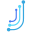)](https://jvelezmagic.com/)

![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/janitor/utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True,   # True
    True or None,  # True
    
    None or False,  # False
    False or None,  # None
    
    None == None,   # True
    None is None,   # True
    
    # None + True,  # Error
    # None / False, # Error
    
    type(None),     # <class 'NoneType'>
    
    sep="\n"
)

True
True
False
None
True
True
<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan or True,     # nan
    True or np.nan,     # True
    
    np.nan or False,    # nan
    False or np.nan,    # nan
    
    np.nan == np.nan,   # False
    np.nan is np.nan,   # True
    
    np.nan / 2,         # nan
    np.nan * 7,         # nan
    
    type(np.nan),       # <class 'float'>
    np.isnan(np.nan),   # True
    
    sep="\n"
)

nan
True
nan
nan
False
True
nan
nan
<class 'float'>
True


In [6]:
if np.nan:
    print("truthy value")
else:
    print("falsy value") # 0, None, (''), ['']

truthy value


In [7]:
print(
    None or True,       # True
    None or False,      # False

    True  or None,      # True
    False or None,      # None

    np.nan or True,     # nan
    np.nan or False,    # nan

    True  or np.nan,    # True
    False or np.nan,    # nan

    sep = "\n"
)

True
False
True
None
nan
nan
True
nan


### Pandas

In [8]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA,  np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [9]:
test_missing_df.isna()
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [10]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [11]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [12]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [13]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [14]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [15]:
!wget -O ./data/raw/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

./data/raw/pima-indians-diabetes.csv: No such file or directory


In [16]:
diabetes_df = pd.read_csv(
    filepath_or_buffer="../data/raw/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [17]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [18]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    #print("dataset_file => ", dataset_file)
    
    dataset_output_file = f"../data/raw_2/{ dataset_file }"
    #print("dataset_file => ", dataset_output_file)
    
    dataset_url = f"{ base_url }{ dataset_file }"
    #print("dataset_file => ", dataset_url, "\n")
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)
    
datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [19]:
for dataset_name, dataset_df in datasets_dfs.items():
    print(f"Information for dataset: {dataset_name}")
    print(f"Shape (filas y columnas): {dataset_df.shape}")
    print()

Information for dataset: oceanbuoys_df
Shape (filas y columnas): (736, 8)

Information for dataset: pedestrian_df
Shape (filas y columnas): (37700, 9)

Information for dataset: riskfactors_df
Shape (filas y columnas): (245, 34)



#### Incluir conjuntos de datos en nuestro ambiente local

In [20]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [21]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [22]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

In [23]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [24]:
riskfactors_df.size # 245 * 34 = 8330

8330

In [25]:
(
    riskfactors_df.shape,
    riskfactors_df.size
)
# 245 observaciones o filas
# 34  variables     o columnas
# 8330 elementos en total, entre completos, NaN y None

((245, 34), 8330)

In [26]:
riskfactors_df.isnull()
#riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [27]:
# Cantidad de elementos definidos
print('  elementos Definidos    => ', riskfactors_df.missing.number_complete())

# Cantidad de elementos no asignados
print('+ elementos NO Definidos => ', riskfactors_df.missing.number_missing())

# Cantidad total de elementos
print('= elementos Totales      => ', riskfactors_df.size)

  elementos Definidos    =>  7144
+ elementos NO Definidos =>  1186
= elementos Totales      =>  8330


### Resúmenes básicos de valores faltantes

In [28]:
riskfactors_df.shape

riskfactors_df.missing.number_complete()


riskfactors_df.missing.number_missing()

riskfactors_df.missing.missing_variable_summary()

riskfactors_df.missing.missing_variable_table()

riskfactors_df.missing.missing_case_summary()

riskfactors_df.missing.missing_case_table()

(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)



,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


#### Número total de valores completos (sin observaciones faltantes)

In [29]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [30]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [31]:
# Cantidad y porcentaje de elementos no definiidos por VARIABLE (COLUMNA)
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


###### Tabulación del resumen por variable

In [32]:
%run pandas-missing-extension.ipynb

In [33]:
# La tabla incluye la cantidad de variables (n_variables) que 
# tienen la misma cantidad específica de valores faltantes, 
# así como el porcentaje relativo de variables en el conjunto total que 
# tienen esa cantidad de valores faltantes.

riskfactors_df.missing.missing_variable_table()

# hay "x" variables que tienen "y" valores perdidos cada una
# pct_variables = x / 34

,n_variables,n_missing_in_variable,pct_variables
0,10,0,29.411765
1,6,8,17.647059
2,4,2,11.764706
3,3,3,8.823529
4,2,1,5.882353
5,1,10,2.941176
6,1,11,2.941176
7,1,113,2.941176
8,1,128,2.941176
9,1,134,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [34]:
# filas = obsevaciones = casos = case
riskfactors_df.missing.missing_case_summary()

# y lo que sucede es que se han "agregado" dos columnas al
# dataframe antes de hacer el calculo, por ello es que shape[1]
# toma el valor de 36 (34 + 2), y por esta razón se deben restar
# esas dos columnas "nuevas".

,case,n_missing,pct_missing
0,0,6,17.647059
1,1,6,17.647059
2,2,7,20.588235
3,3,12,35.294118
4,4,5,14.705882
...,...,...,...
240,240,6,17.647059
241,241,5,14.705882
242,242,3,8.823529
243,243,2,5.882353


In [35]:
riskfactors_df.shape

(245, 34)

###### Tabulación del resumen por caso

In [36]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


In [37]:
import timeit
import pandas as pd

# Crear un DataFrame de ejemplo supergrande (ajusta el tamaño según sea necesario)
df_supergrande = pd.DataFrame({'n_cases': range(100000)})

# Opción a
time_a = timeit.timeit(lambda: df_supergrande.assign(
    pct_case=lambda df: df.n_cases / df.n_cases.sum() * 100), number=100)

# Opción b
long = len(df_supergrande)
time_b = timeit.timeit(lambda: df_supergrande.assign(
    pct_case=lambda df: df.n_cases / long * 100), number=100)

print(f'Tiempo de ejecución para la opción a: {time_a:.4f} segundos')
print(f'Tiempo de ejecución para la opción b: {time_b:.4f} segundos')
print(f"Porcentaje de diferencia en tiempo: {((time_a/time_b)-1)*100:.4f}%")


Tiempo de ejecución para la opción a: 0.2857 segundos
Tiempo de ejecución para la opción b: 0.2229 segundos
Porcentaje de diferencia en tiempo: 28.1377%


In [38]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

### Intervalos de valores faltantes

In [39]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="bmi",
        span_every=50 # bloques de 50 filas
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,2,48,4.000000,96.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [40]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

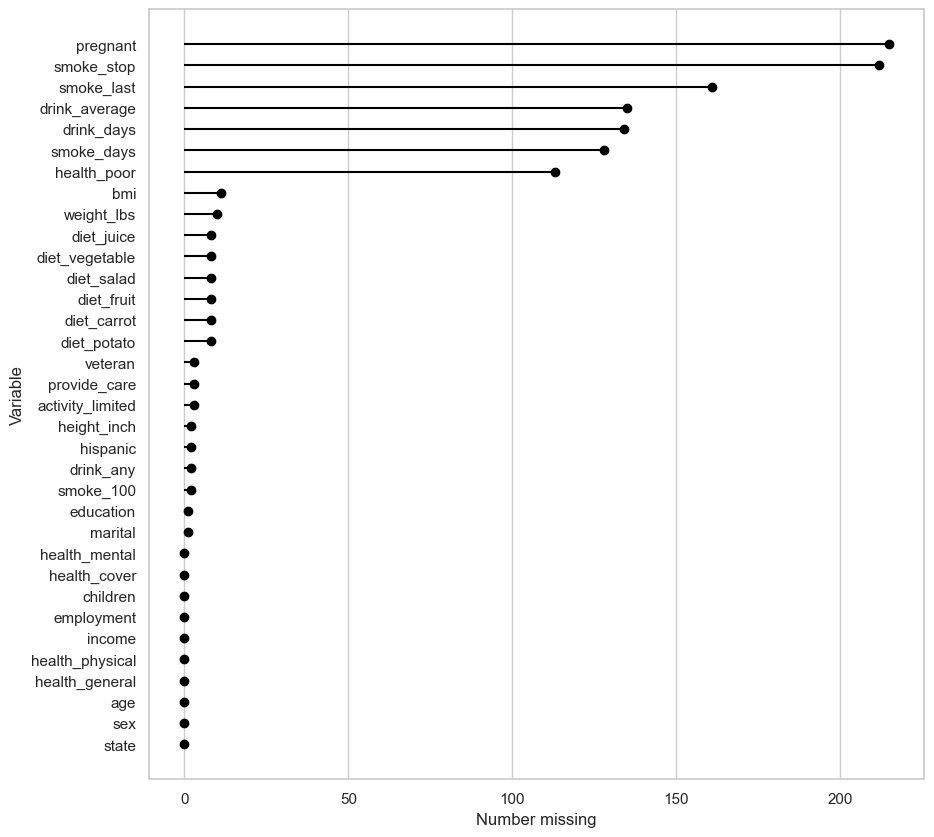

In [41]:
# ver cantidad de valores faltantes
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

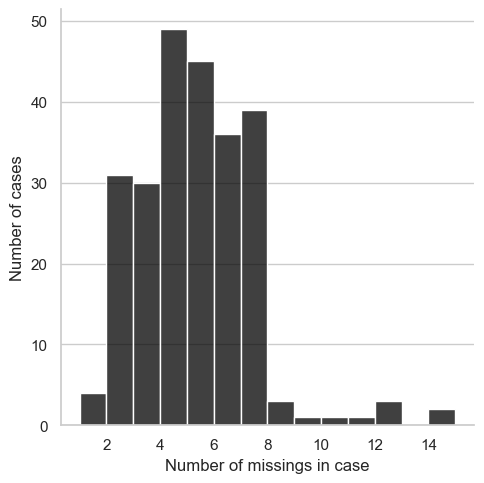

In [42]:
riskfactors_df.missing.missing_case_plot()

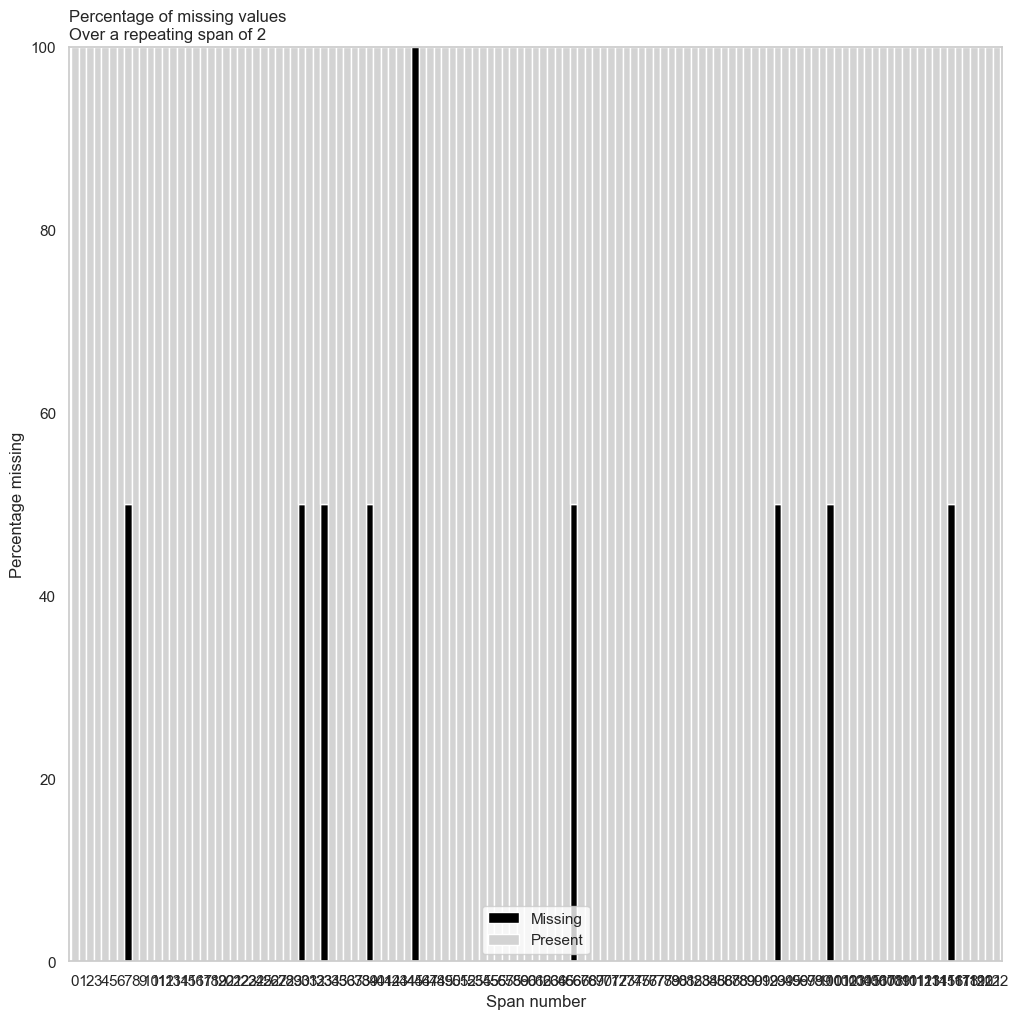

In [43]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=2,
        rot=0
    )
)

<Axes: >

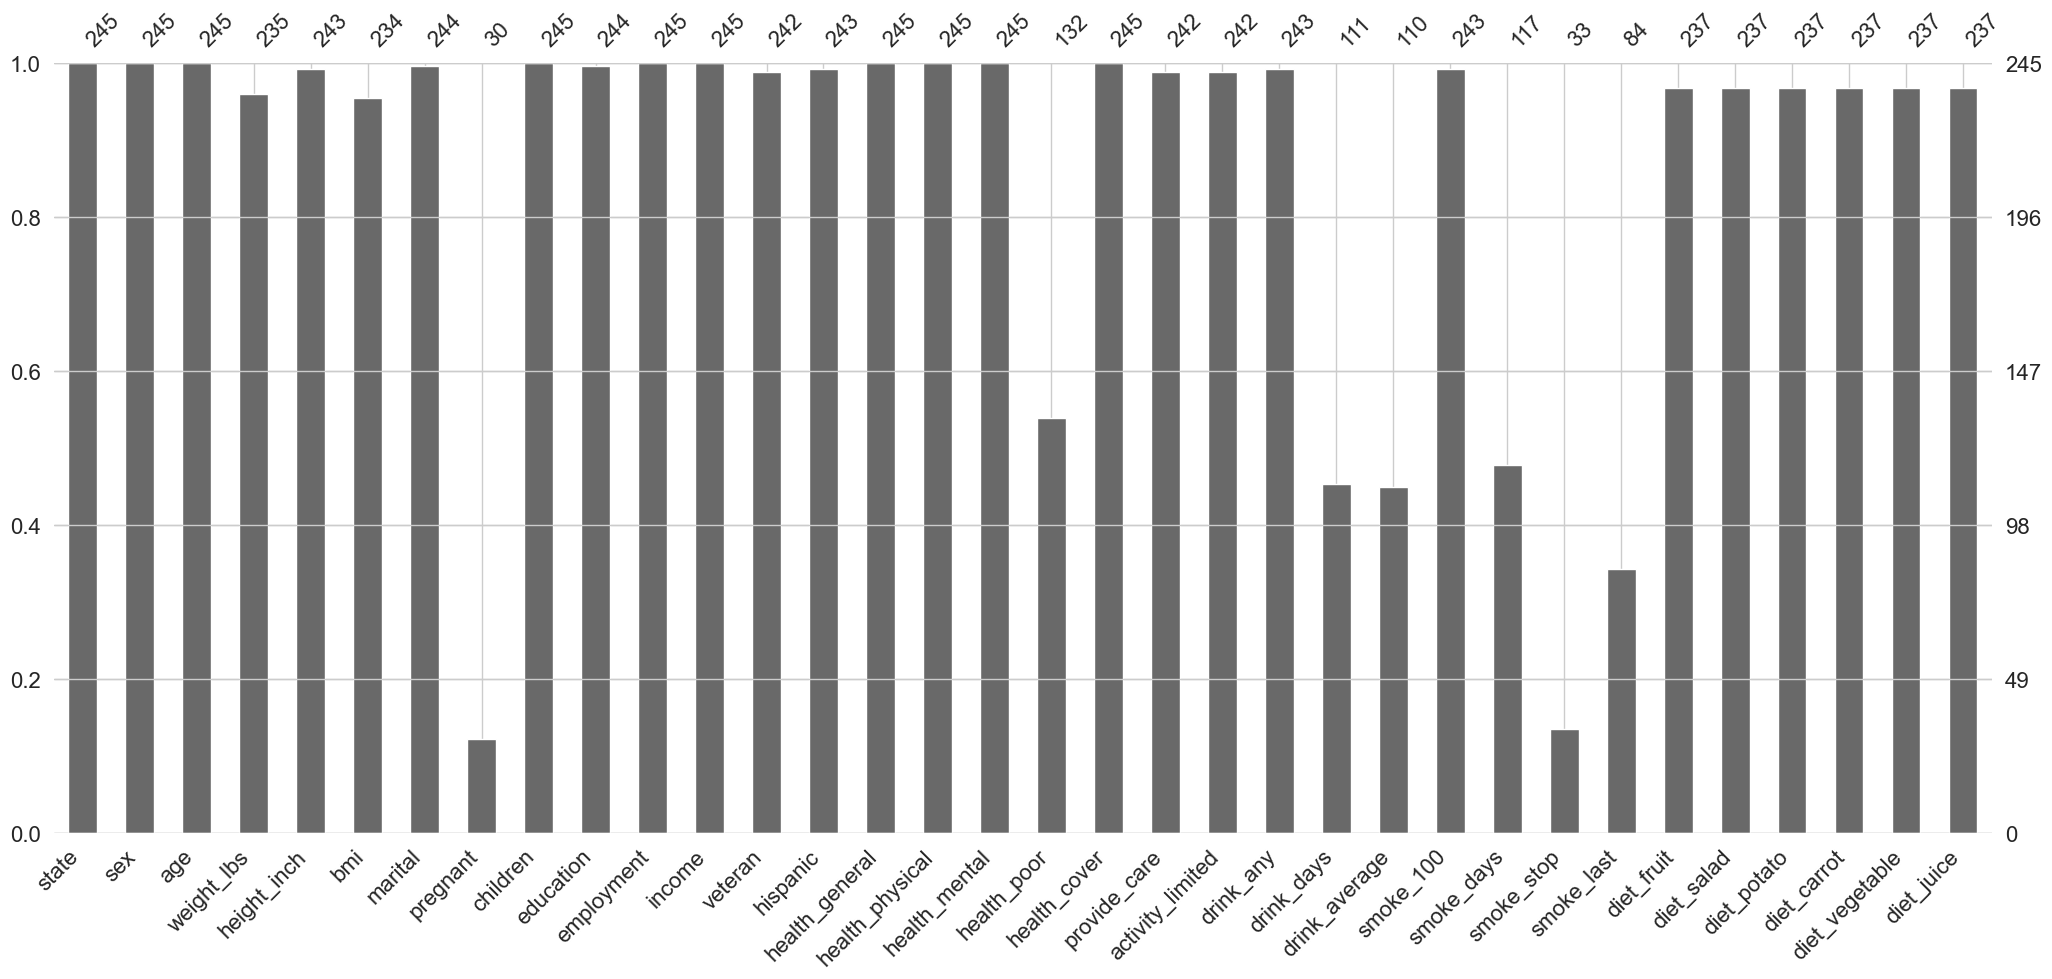

In [44]:
missingno.bar(df = riskfactors_df)

<Axes: >

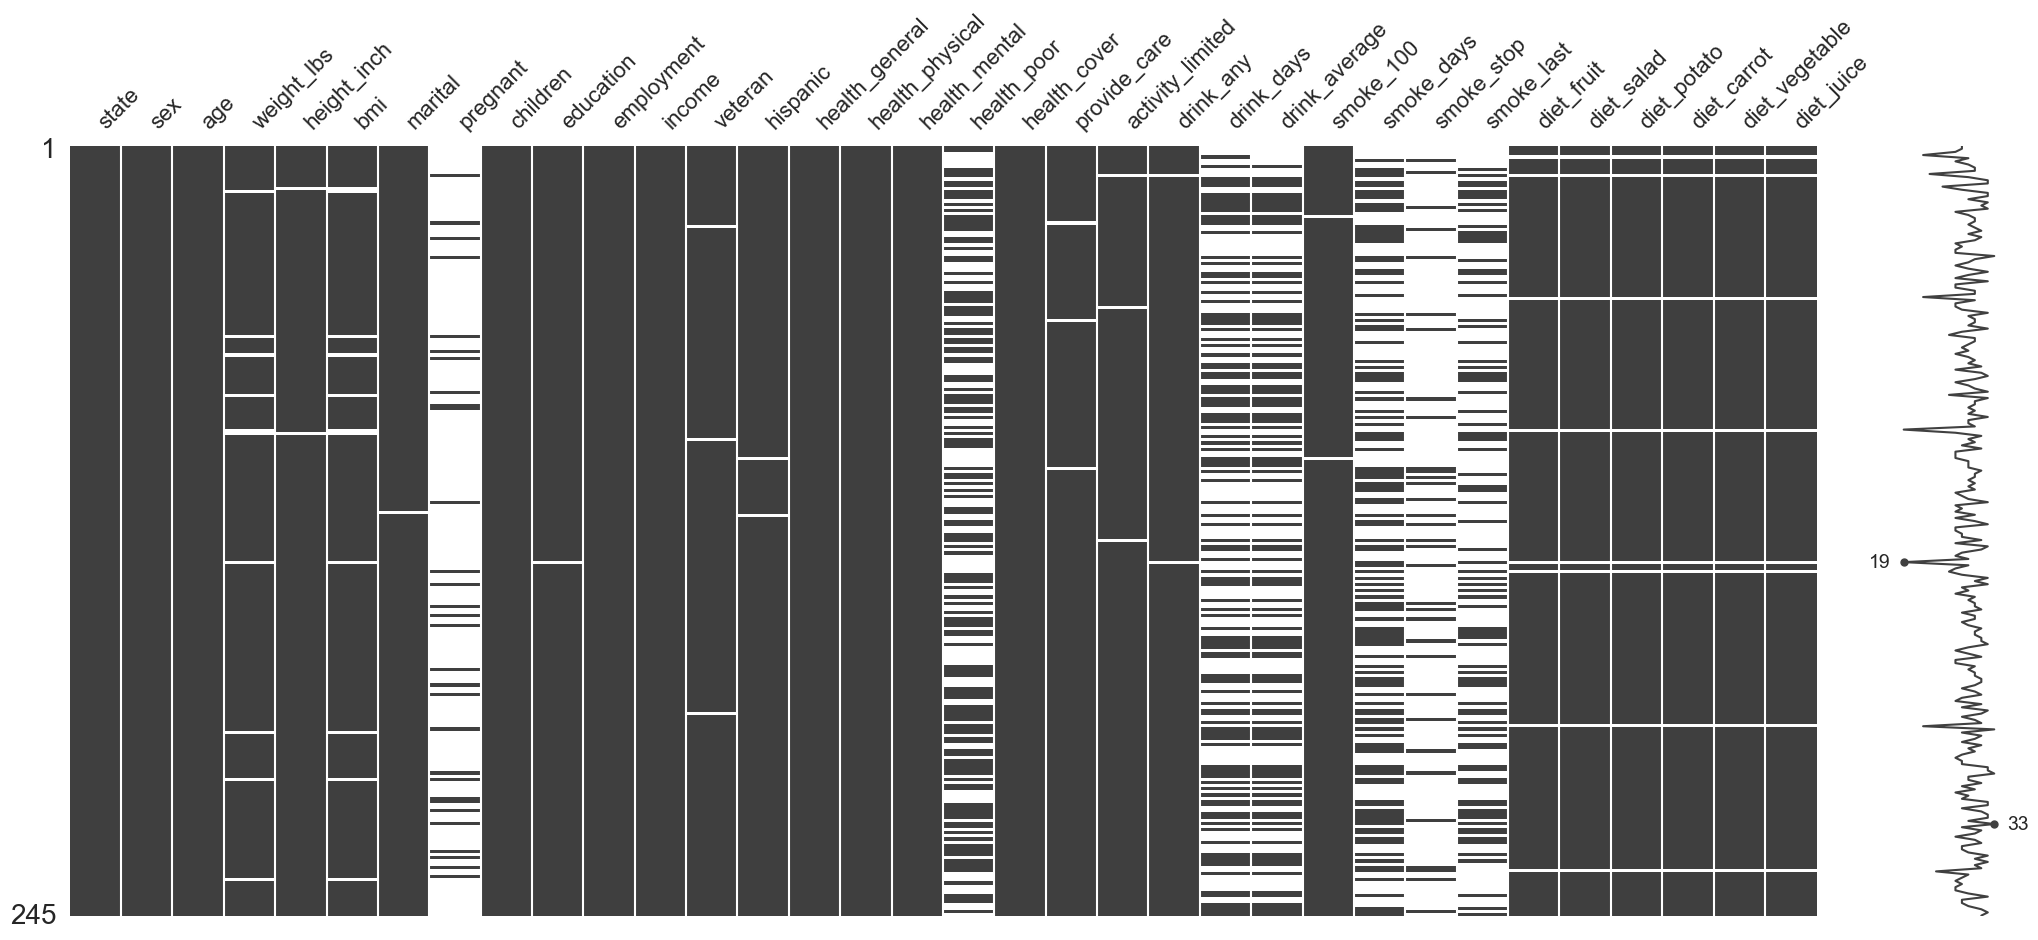

In [45]:
missingno.matrix(df=riskfactors_df)

In [46]:
#missingno.heatmap(df=riskfactors_df)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

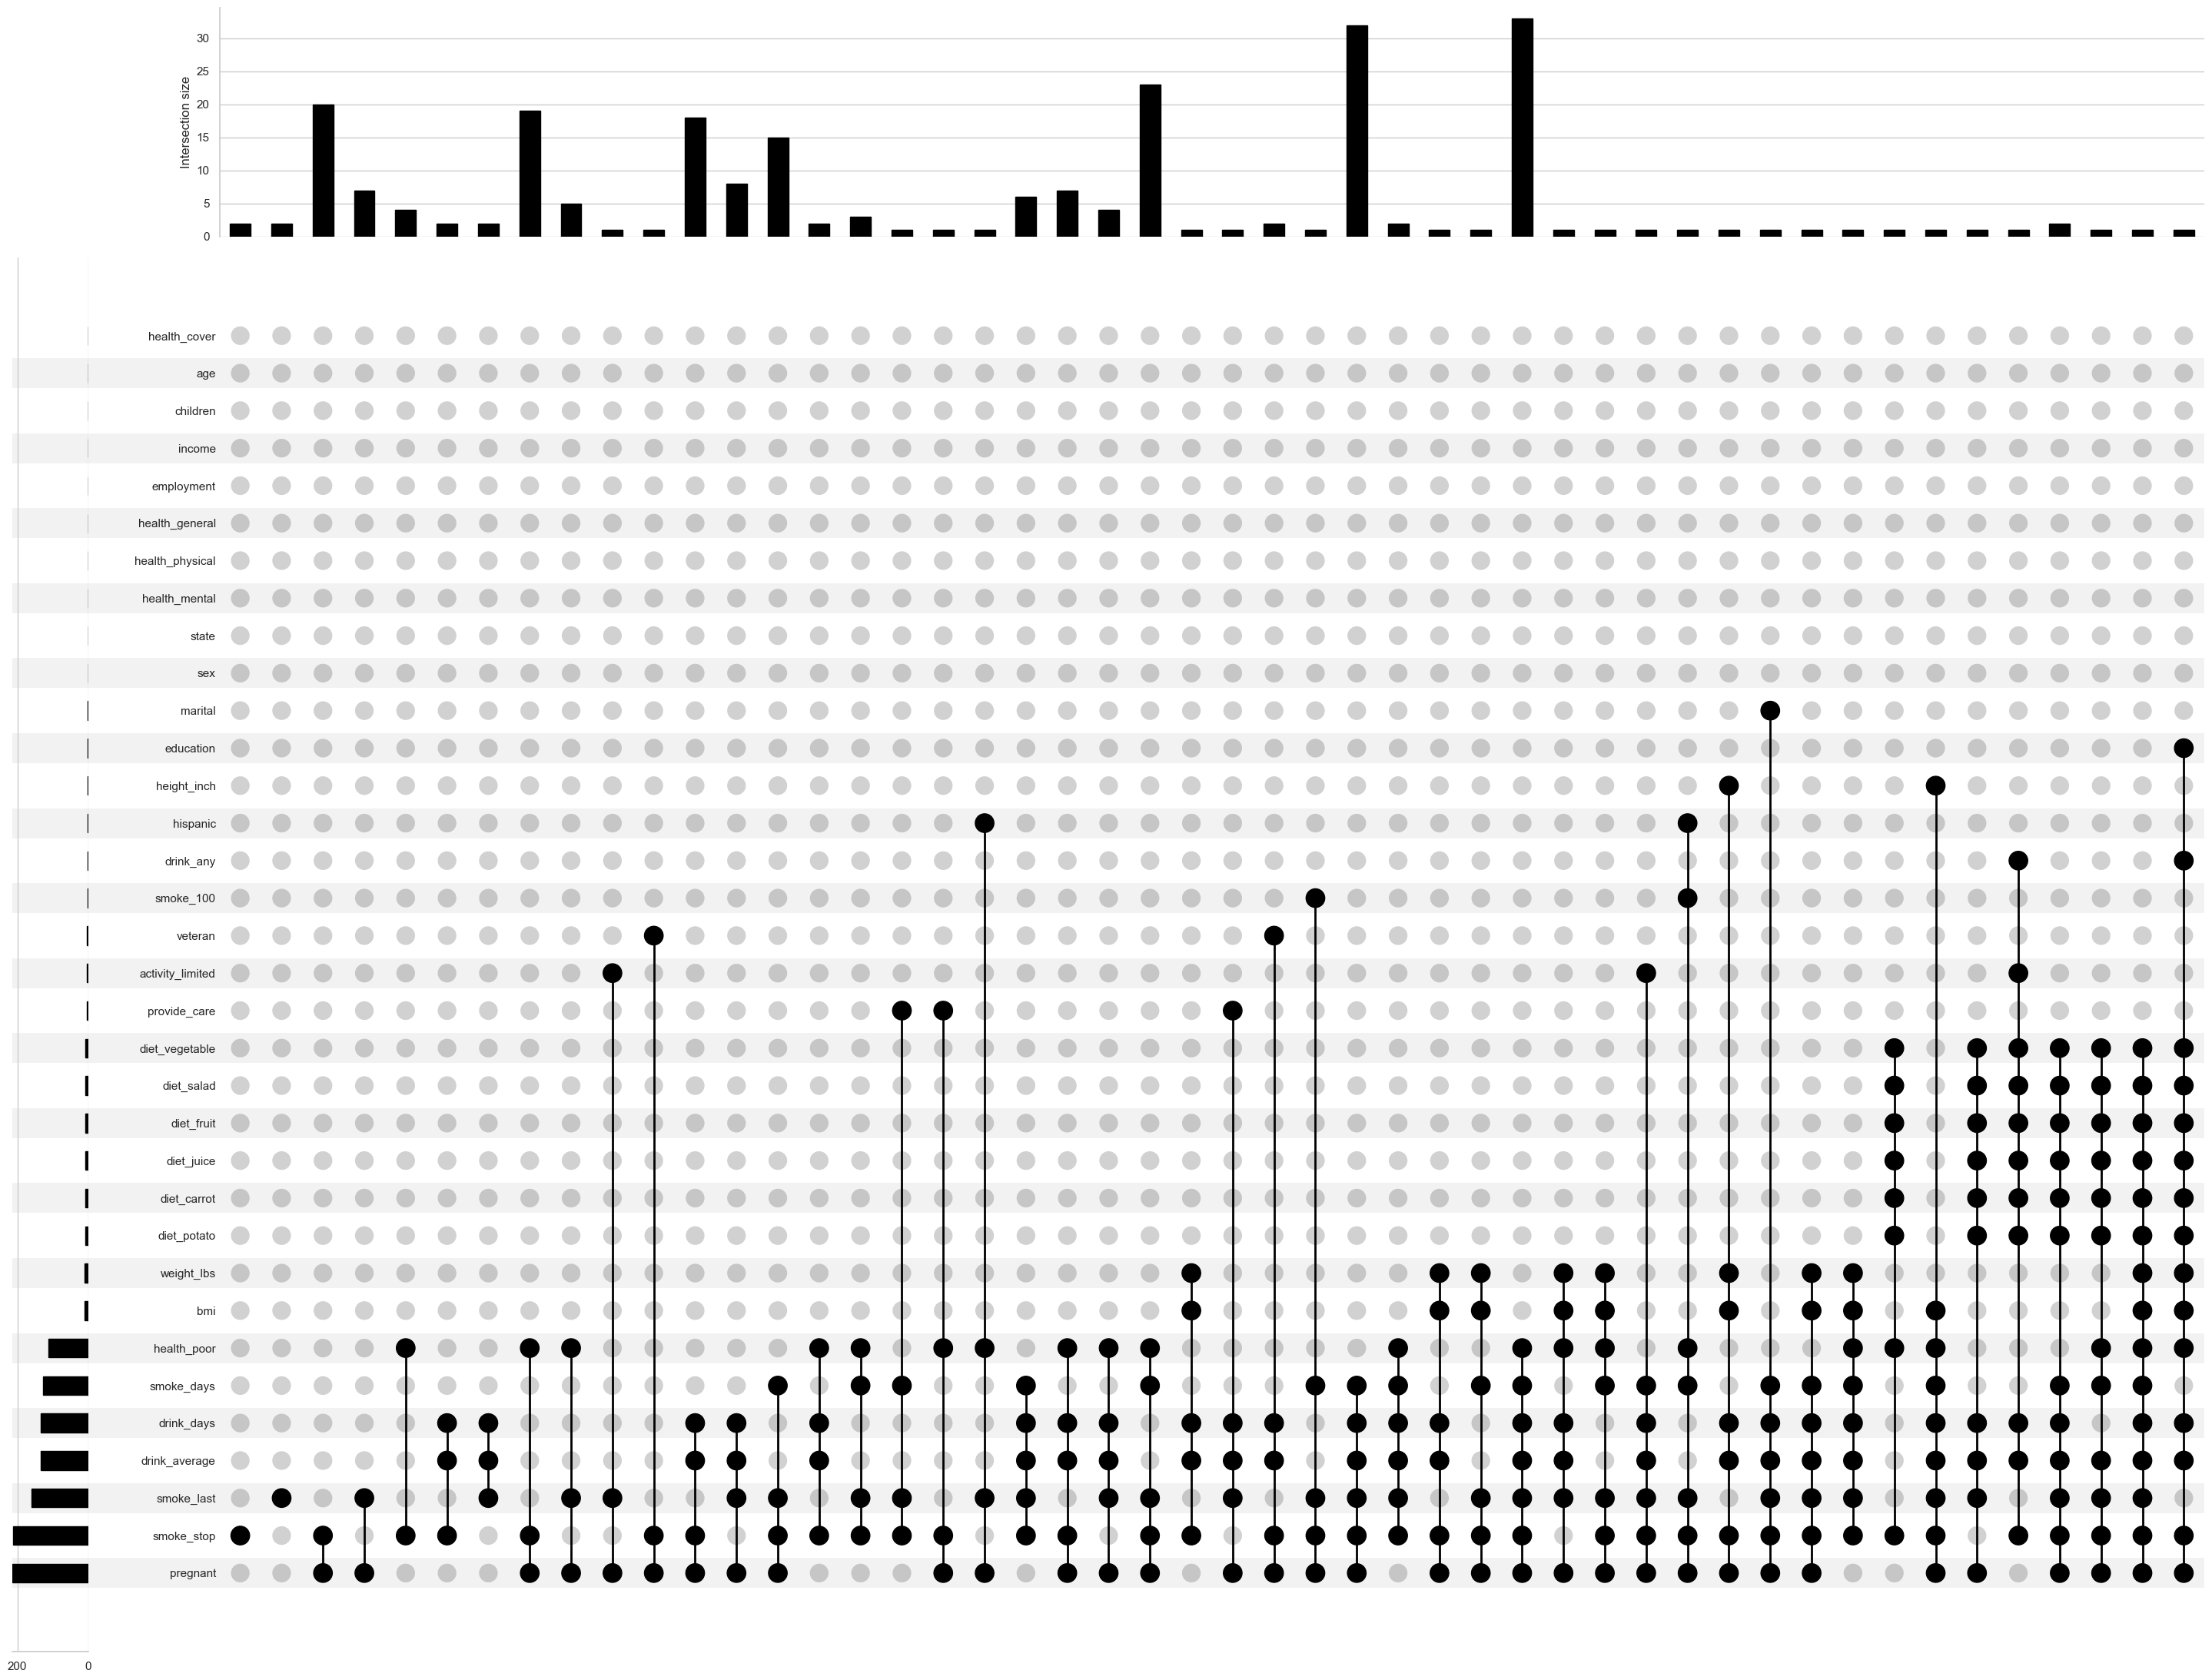

In [47]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 50
    )
)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

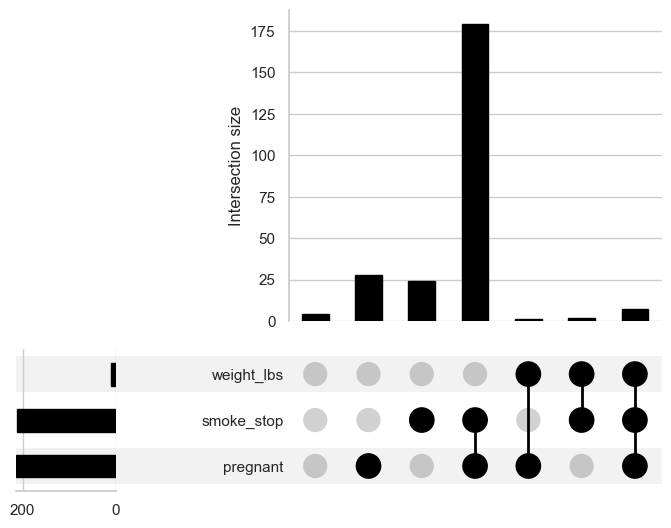

In [48]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=["pregnant", "weight_lbs", "smoke_stop"],
        element_size=50
    )
)

In [49]:
# Crear instancia y llamar a la función
#analysis = MissingMethods(riskfactors_df)
#analysis.missing_venn_diagram()

## Valores faltantes

In [50]:
# Contar la cantidad de ocurrencias del string "-" en todo el DataFrame
#contador_ocurrencias = (riskfactors_df.applymap(lambda x: '--' in str(x))).sum().sum()

abc = '-'
column_index = 6  # Reemplaza con el índice de la columna que deseas
column_name = riskfactors_df.columns[column_index]
contador_ocurrencias = (riskfactors_df.iloc[:, column_index].apply(lambda x: str(x).count(abc))).sum()
print(f"La cantidad de ocurrencias del string {abc} en la columna {column_name} es: {contador_ocurrencias}")

contador_ocurrencias = (riskfactors_df.apply(lambda x: x.map(lambda x: abc in str(x)))).sum().sum()
print(f"La cantidad de ocurrencias del string {abc} en el DataFrame es: {contador_ocurrencias}")


La cantidad de ocurrencias del string - en la columna marital es: 0.0
La cantidad de ocurrencias del string - en el DataFrame es: 222


In [51]:
abc = 'NaN'  # Reemplaza con el valor que estás buscando contar

# Contar la cantidad de ocurrencias del string "-" en todo el DataFrame
contador_ocurrencias_total = (riskfactors_df.apply(lambda x: x.map(lambda x: abc in str(x)))).sum().sum()
print(f"La cantidad de ocurrencias del string '{abc}' en el DataFrame es: {contador_ocurrencias_total}")

# Iterar por cada columna del DataFrame
if contador_ocurrencias_total > 0:
    print('\n')
    for column_name in riskfactors_df.columns:
        contador_ocurrencias = (riskfactors_df[column_name].apply(lambda x: str(x).count(abc))).sum()
        if contador_ocurrencias > 0:
            print(f"La cantidad de ocurrencias del string '{abc}' en la columna {column_name} es: {contador_ocurrencias}")

La cantidad de ocurrencias del string 'NaN' en el DataFrame es: 0


In [52]:
riskfactors_df['income']

0        35-50k
1        35-50k
2          <10k
3          >75k
4        50-75k
         ...   
240      10-15k
241      15-20k
242      35-50k
243      20-25k
244    Dontknow
Name: income, Length: 245, dtype: category
Categories (10, object): ['10-15k', '15-20k', '20-25k', '25-35k', ..., '<10k', '>75k', 'Dontknow', 'Refused']

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [53]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [54]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [55]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [56]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [57]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [58]:
print(missing_data_example_df.x.unique())
print(missing_data_example_df.y.unique())
print(missing_data_example_df.z.unique())

[1 3 'NA' -99 -98]
['A' 'N/A' 'NA' 'E' 'F' 'G']
[-100  -99  -98 -101   -1]


In [59]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

In [60]:
(
    missing_data_example_df
    .select_dtypes(int)
    .apply(pd.unique)
)

,z
0,-100
1,-99
2,-98
3,-101
4,-1


### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [61]:
pd.read_csv(
    "../data/raw/missing_data_enconding_example.csv",
    na_filter=True,
    na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [62]:
(
    missing_data_example_df
    .replace(
        
        to_replace=[-99, "NA"],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [63]:
# para una columna en específico
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {-99: np.nan}
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [64]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [65]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",
        names_from="time",
        values_from="value"
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


In [66]:
pivoted_df = implicit_to_explicit_df.pivot(
    index="name", 
    columns="time", 
    values="value"
)
pivoted_df

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


In [67]:
pd.pivot(
    data = implicit_to_explicit_df,
    index   ="name",    # variable nombre como filas
    columns ="time",    # variabletime como columnas
    values  ="value"    # variablevalue como valores de la tabla
)

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [68]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    )
)

name 
lynn     3
zelda    1
Name: count, dtype: int64

In [69]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    ).reset_index(
        name="n"
    ).query(
        "n <= 3"
    )
)

,name,n
0,lynn,3
1,zelda,1


In [70]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    ).reset_index(
        name="n"
    ).query(
        "n <= 1"
    )
)

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [71]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [72]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        {"name": ["lynn", "zelda"]},
        {"time": ["morning", "afternoon"]},
        sort=True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valores faltantes

In [73]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        "name",
        "time",
        fill_value=np.nan
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/janitor/functions/complete.py:244: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implícitos

In [74]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        "name",
        "time",
        fill_value=0,
        explicit=False
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/janitor/functions/complete.py:270: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(df[column_name]):


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


In [75]:
(
    implicit_to_explicit_df
    .complete(
        "name", 
        "time",
        fill_value=implicit_to_explicit_df["value"].mean(),
        explicit=False
    )
)


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/janitor/functions/complete.py:270: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(df[column_name]):


,name,time,value
0,lynn,morning,350.000000
1,lynn,afternoon,310.000000
2,lynn,night,NaN
3,zelda,morning,320.000000
4,zelda,afternoon,326.666667
5,zelda,night,326.666667


## Tipos de valores faltantes

In [76]:
diabetes_df.head(20)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


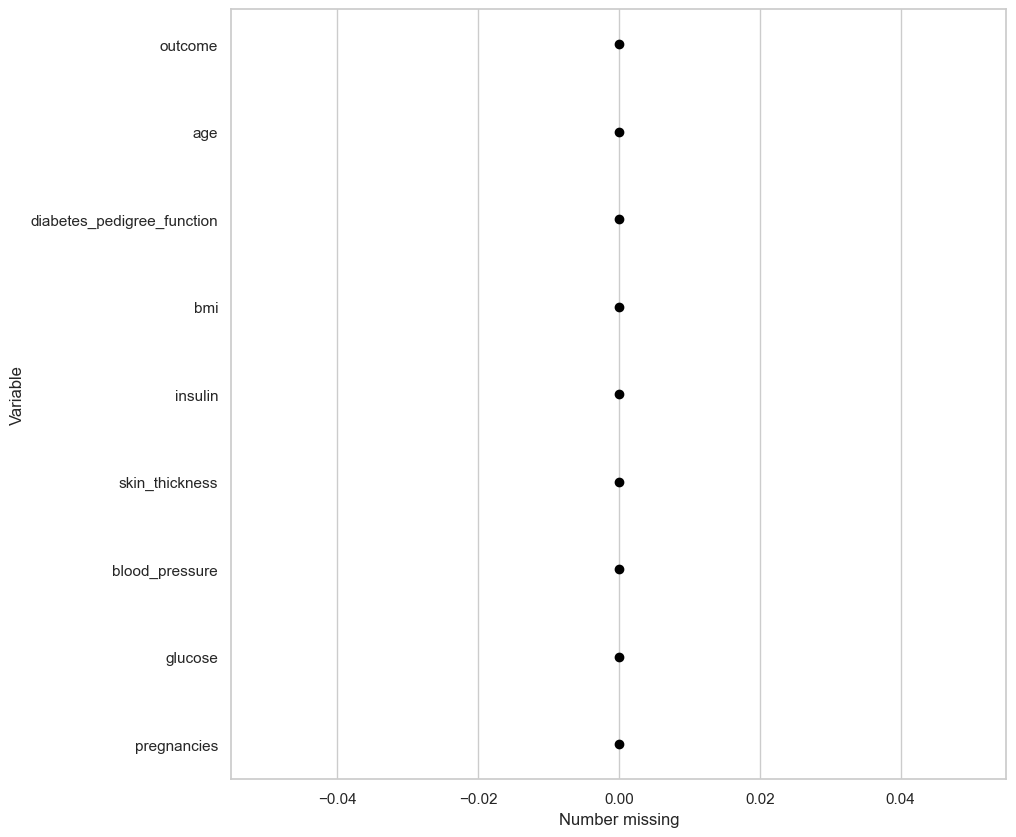

In [77]:
diabetes_df.missing.missing_variable_plot()

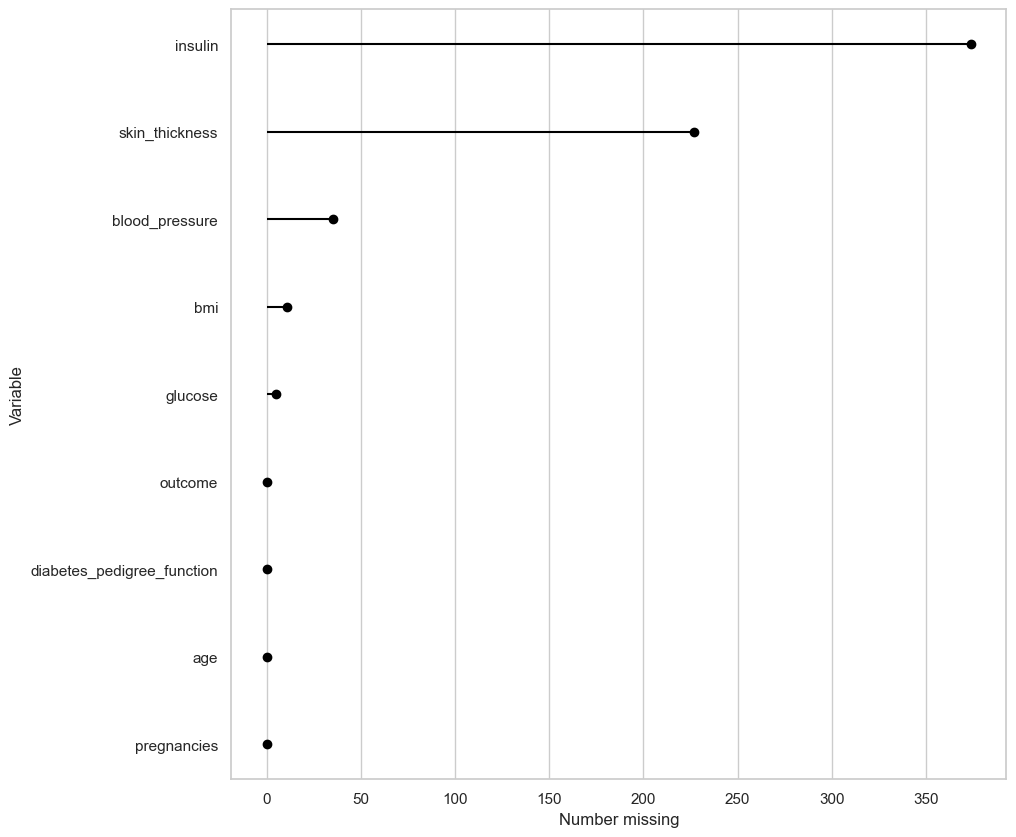

In [78]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

### _Missing Completely At Random_ (MCAR)

In [79]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
)

,insulin,skin_thickness,blood_pressure,bmi,glucose,pregnancies,diabetes_pedigree_function,age,outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


<Axes: >

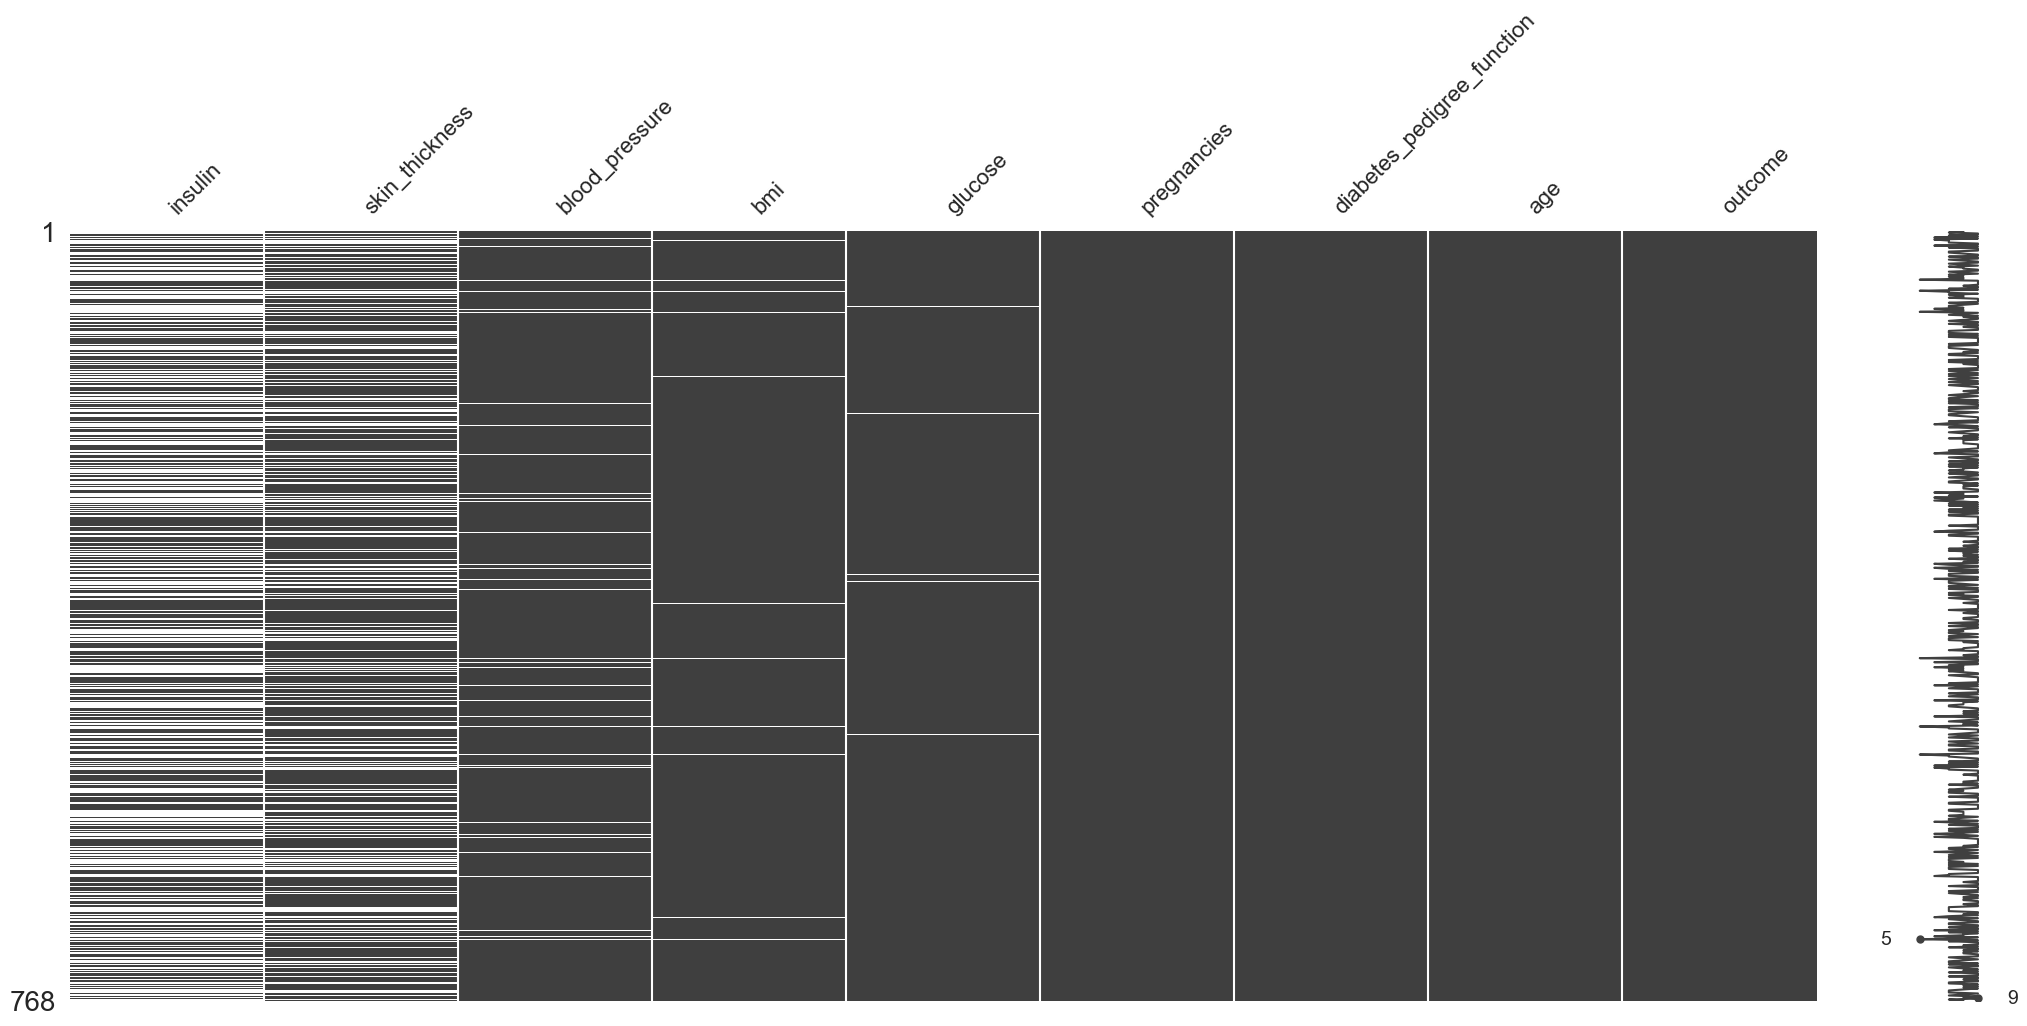

In [80]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### _Missing At Random_ (MAR)

In [81]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "blood_pressure")
)

,insulin,skin_thickness,blood_pressure,bmi,glucose,pregnancies,diabetes_pedigree_function,age,outcome
597,25.0,19.0,24.0,27.8,89.0,1,0.559,21,0
18,83.0,38.0,30.0,43.3,103.0,1,0.183,33,0
125,99.0,42.0,30.0,55.0,88.0,1,0.496,26,1
599,120.0,18.0,38.0,23.1,109.0,1,0.407,26,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
619,NaN,NaN,NaN,32.4,119.0,0,0.141,24,1
643,NaN,NaN,NaN,28.0,90.0,4,0.610,31,0
697,NaN,NaN,NaN,25.0,99.0,0,0.253,22,0
703,NaN,NaN,NaN,38.5,129.0,2,0.304,41,0


<Axes: >

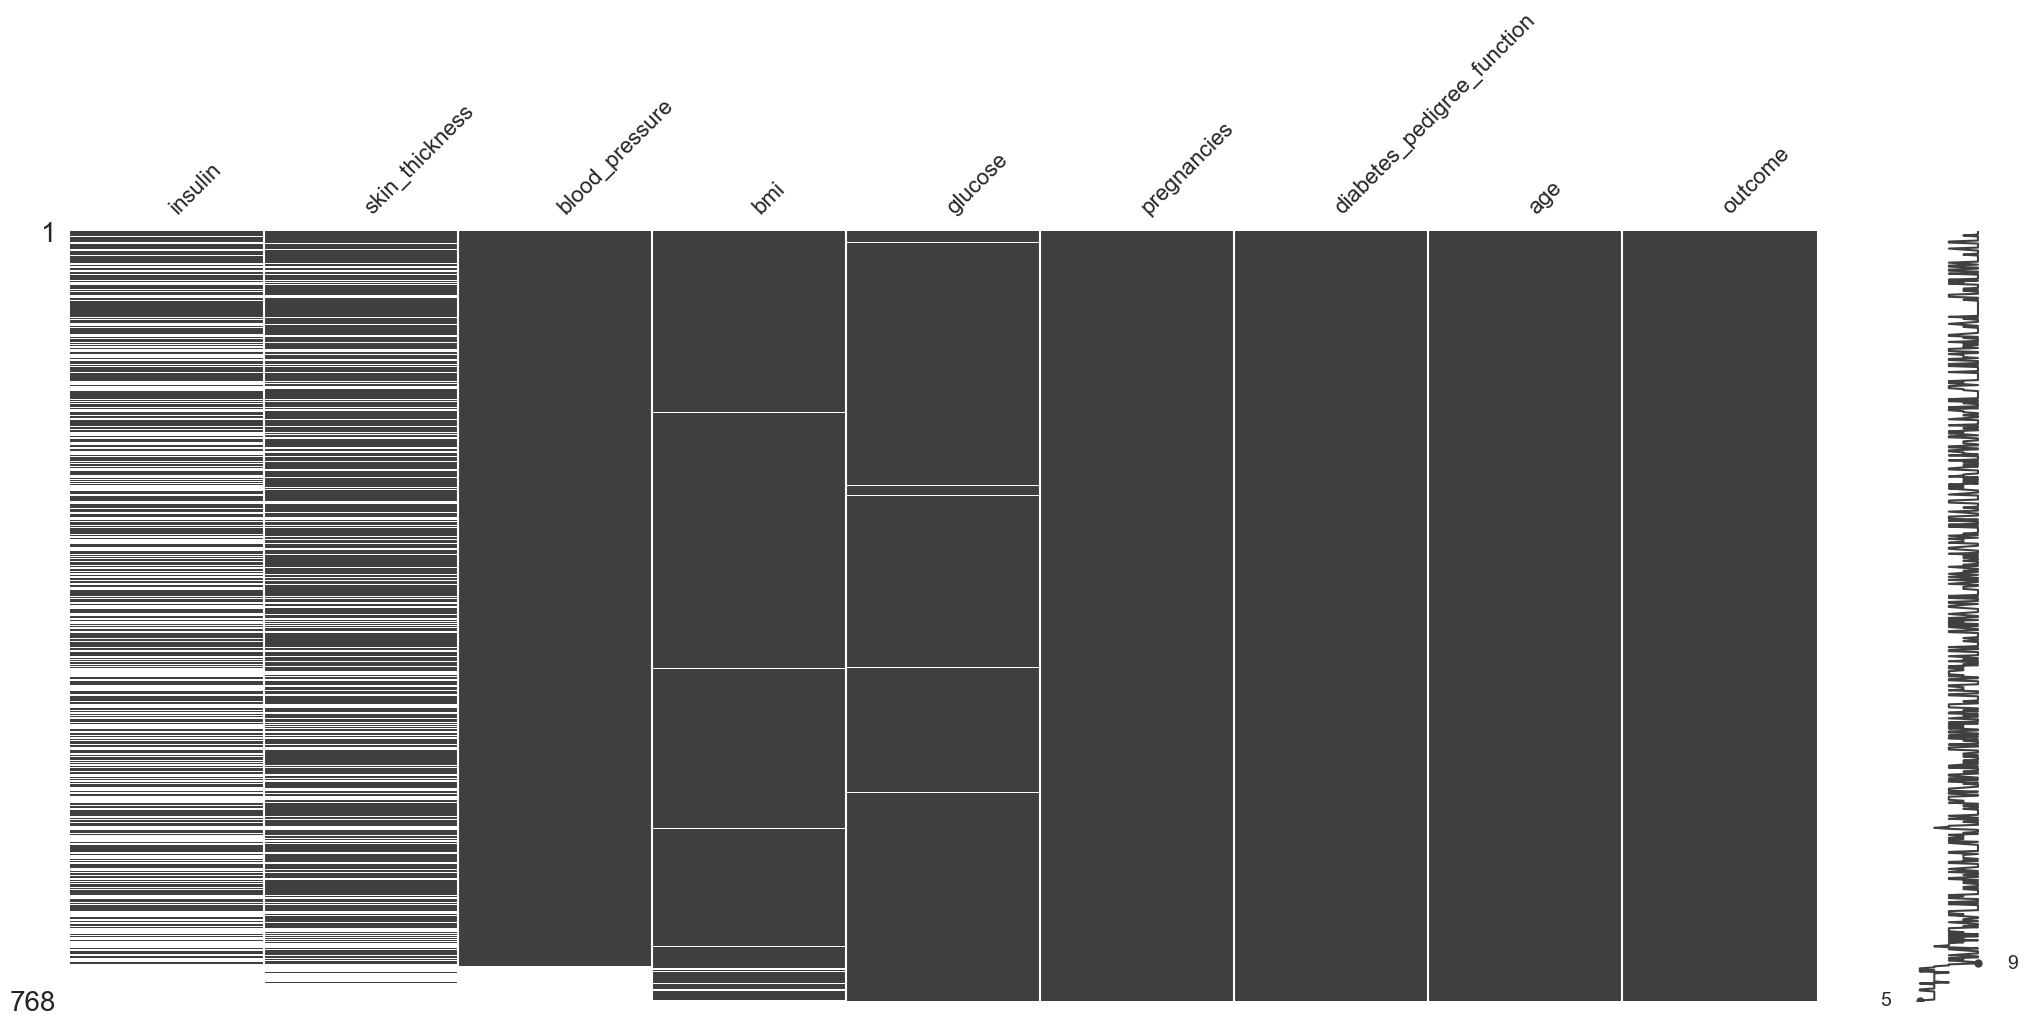

In [82]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "blood_pressure")
    .pipe(missingno.matrix)
)

### _Missing Not At Random_ (MNAR)

<Axes: >

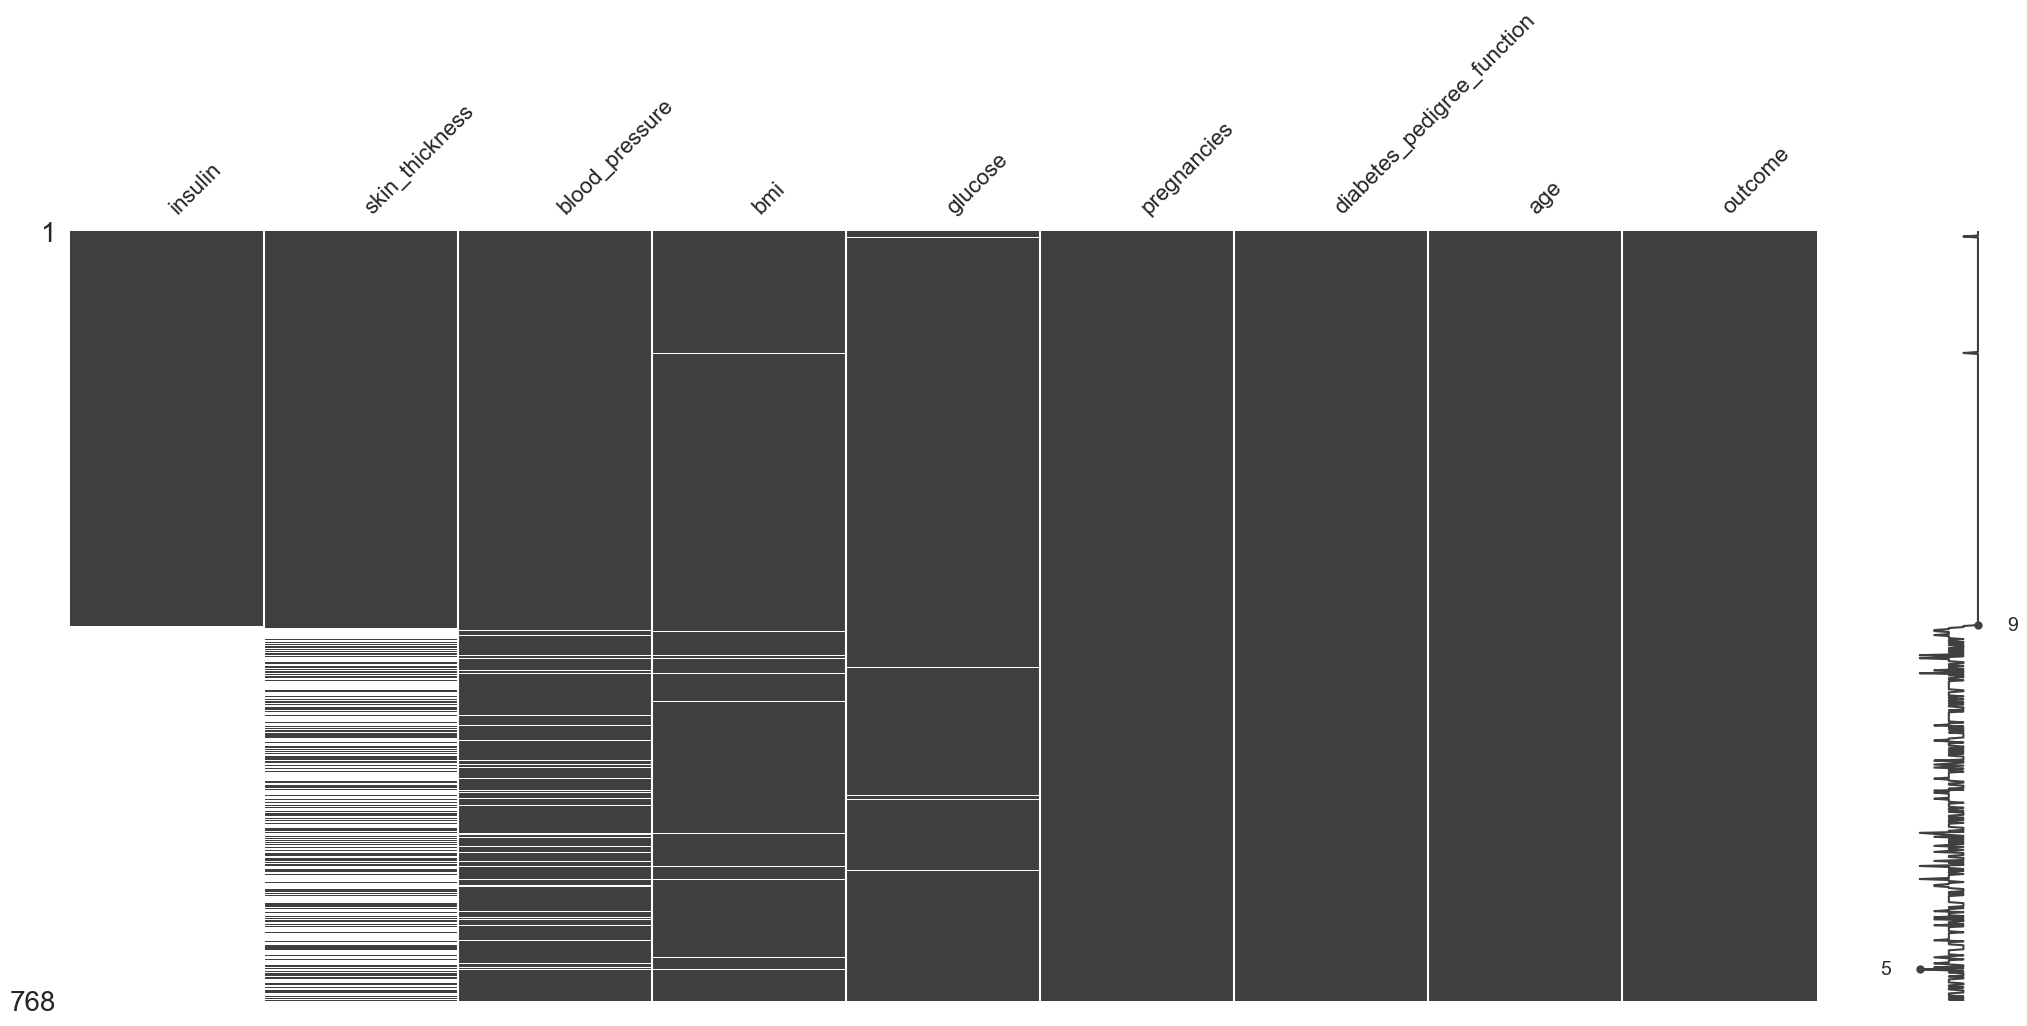

In [83]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values("insulin")
    .pipe(missingno.matrix)
)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [84]:
(
    riskfactors_df
    .isna()
    .replace({
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [85]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [86]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

In [87]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

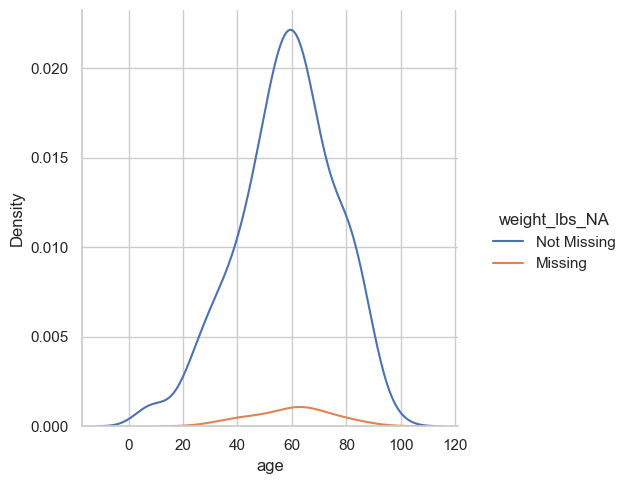

In [88]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA",
                kind="kde"
            )
        )
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be remove

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

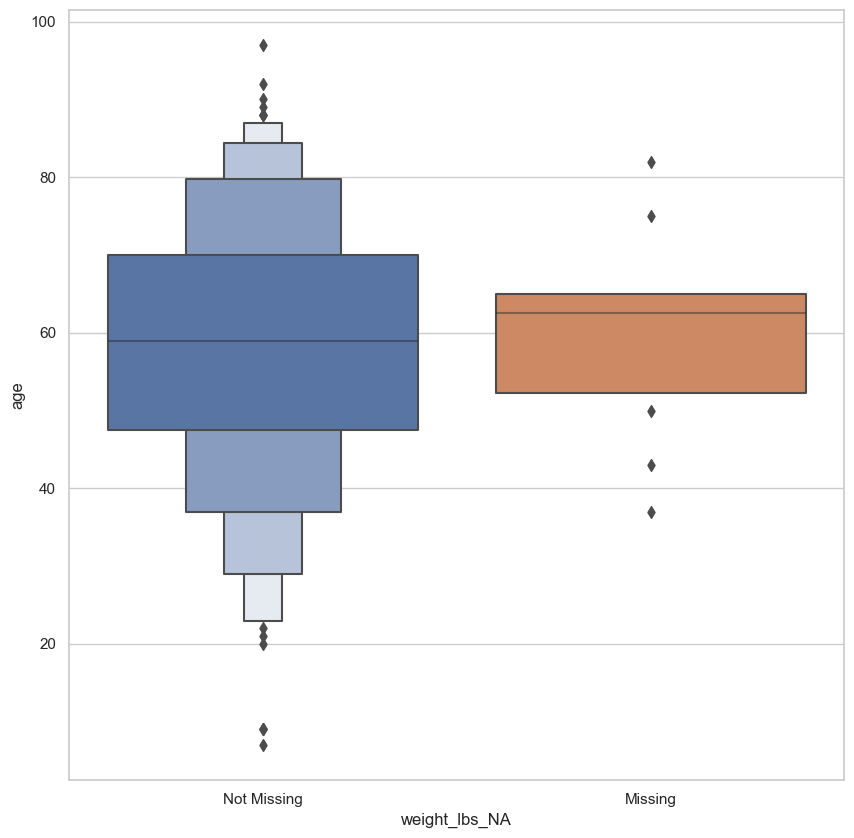

In [89]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",
                y="age",
            )
        )
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

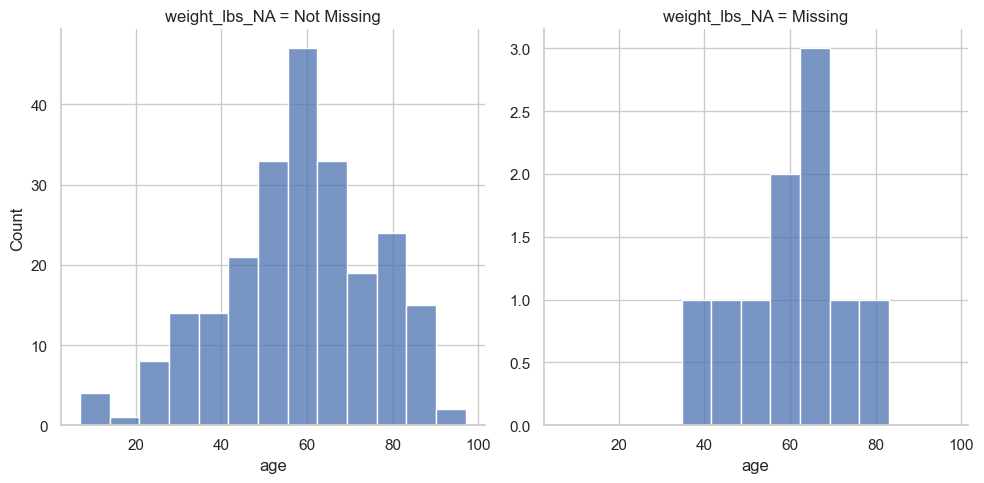

In [90]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

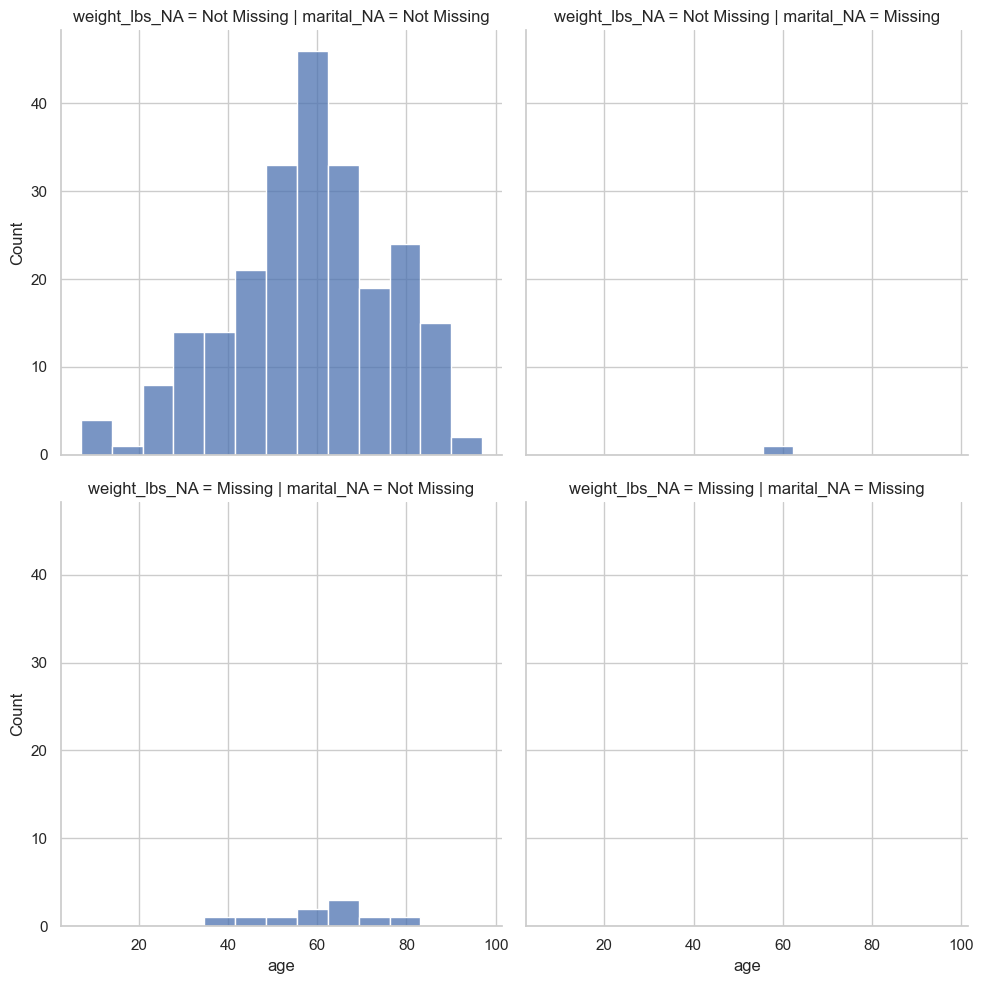

In [91]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="marital_NA",
                row="weight_lbs_NA"
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

In [92]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.075,
    seed: int=42
) -> pd.Series:

    column = column.copy(deep=True)

    # Extract values metadata.
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

In [93]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,190,64,32.68,2,NaN,NaN,1095,261,104,156,521,12
1,170,68,25.90,3,NaN,NaN,52,209,52,0,52,0
2,163,64,28.04,NaN,NaN,NaN,36,156,52,24,24,24
3,230,74,29.59,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135,62,24.74,NaN,NaN,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,NaN,NaN,-7,-7,-7,-7,-7,-7
241,170,74,21.87,NaN,30,3,52,52,52,24,52,24
242,175,71,24.46,NaN,10,2,365,156,104,52,730,365
243,138,64,23.74,0,1,1,730,0,24,156,104,0


In [94]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
    .missing.bind_shadow_matrix()
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,bmi_NA,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,190,64,32.68,2,NaN,NaN,1095,261,104,156,...,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,170,68,25.90,3,NaN,NaN,52,209,52,0,...,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,163,64,28.04,NaN,NaN,NaN,36,156,52,24,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,230,74,29.59,NaN,15,NaN,NaN,NaN,NaN,NaN,...,Not Missing,Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,135,62,24.74,NaN,NaN,NaN,-7,261,209,261,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,NaN,NaN,-7,-7,-7,-7,...,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,170,74,21.87,NaN,30,3,52,52,52,24,...,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,175,71,24.46,NaN,10,2,365,156,104,52,...,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,138,64,23.74,0,1,1,730,0,24,156,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [95]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,bmi_NA,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,190,64,32.68,2,NaN,NaN,1095,261,104,156,...,False,False,True,True,False,False,False,False,False,False
1,170,68,25.90,3,NaN,NaN,52,209,52,0,...,False,False,True,True,False,False,False,False,False,False
2,163,64,28.04,NaN,NaN,NaN,36,156,52,24,...,False,True,True,True,False,False,False,False,False,False
3,230,74,29.59,NaN,15,NaN,NaN,NaN,NaN,NaN,...,False,True,False,True,True,True,True,True,True,True
4,135,62,24.74,NaN,NaN,NaN,-7,261,209,261,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,NaN,NaN,-7,-7,-7,-7,...,False,False,True,True,False,False,False,False,False,False
241,170,74,21.87,NaN,30,3,52,52,52,24,...,False,True,False,False,False,False,False,False,False,False
242,175,71,24.46,NaN,10,2,365,156,104,52,...,False,True,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


In [96]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,bmi_NA,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,190,64,32.68,2,-13.30447,-10.744371,1095,261,104,156,...,False,False,True,True,False,False,False,False,False,False
1,170,68,25.90,3,-11.619161,-9.966536,52,209,52,0,...,False,False,True,True,False,False,False,False,False,False
2,163,64,28.04,-13.30447,-12.258918,-10.261808,36,156,52,24,...,False,True,True,True,False,False,False,False,False,False
3,230,74,29.59,-11.619161,15,-10.441811,-321.125935,-98.641114,-143.138078,-54.14415,...,False,True,False,True,True,True,True,True,True,True
4,135,62,24.74,-12.258918,-12.648924,-11.039375,-7,261,209,261,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,-13.412476,-9.977072,-7,-7,-7,-7,...,False,False,True,True,False,False,False,False,False,False
241,170,74,21.87,-13.552477,30,3,52,52,52,24,...,False,True,False,False,False,False,False,False,False,False
242,175,71,24.46,-13.928428,10,2,365,156,104,52,...,False,True,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


In [97]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA,nullity
0,190,64,32.68,2,-13.30447,-10.744371,1095,261,104,156,...,False,True,True,False,False,False,False,False,False,False
1,170,68,25.90,3,-11.619161,-9.966536,52,209,52,0,...,False,True,True,False,False,False,False,False,False,False
2,163,64,28.04,-13.30447,-12.258918,-10.261808,36,156,52,24,...,True,True,True,False,False,False,False,False,False,False
3,230,74,29.59,-11.619161,15,-10.441811,-321.125935,-98.641114,-143.138078,-54.14415,...,True,False,True,True,True,True,True,True,True,False
4,135,62,24.74,-12.258918,-12.648924,-11.039375,-7,261,209,261,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,-13.412476,-9.977072,-7,-7,-7,-7,...,False,True,True,False,False,False,False,False,False,False
241,170,74,21.87,-13.552477,30,3,52,52,52,24,...,True,False,False,False,False,False,False,False,False,False
242,175,71,24.46,-13.928428,10,2,365,156,104,52,...,True,False,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

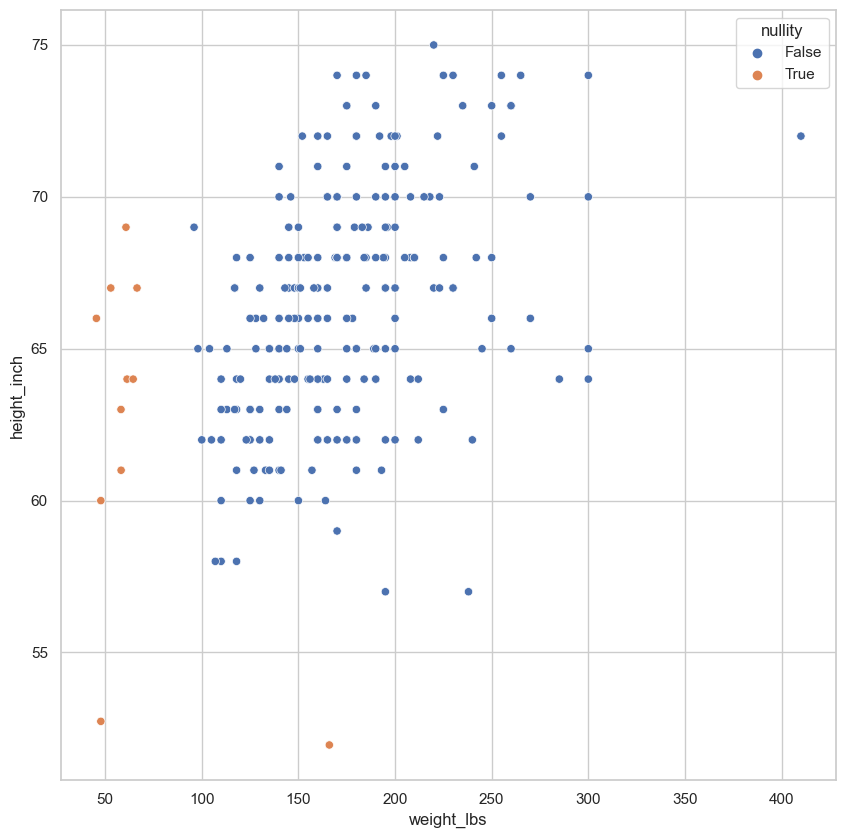

In [98]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_dtypes(
        exclude="category" # excluir las categóricas u objeto
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # quedarnos solo con las nulas
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

## Correlación de nulidad

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

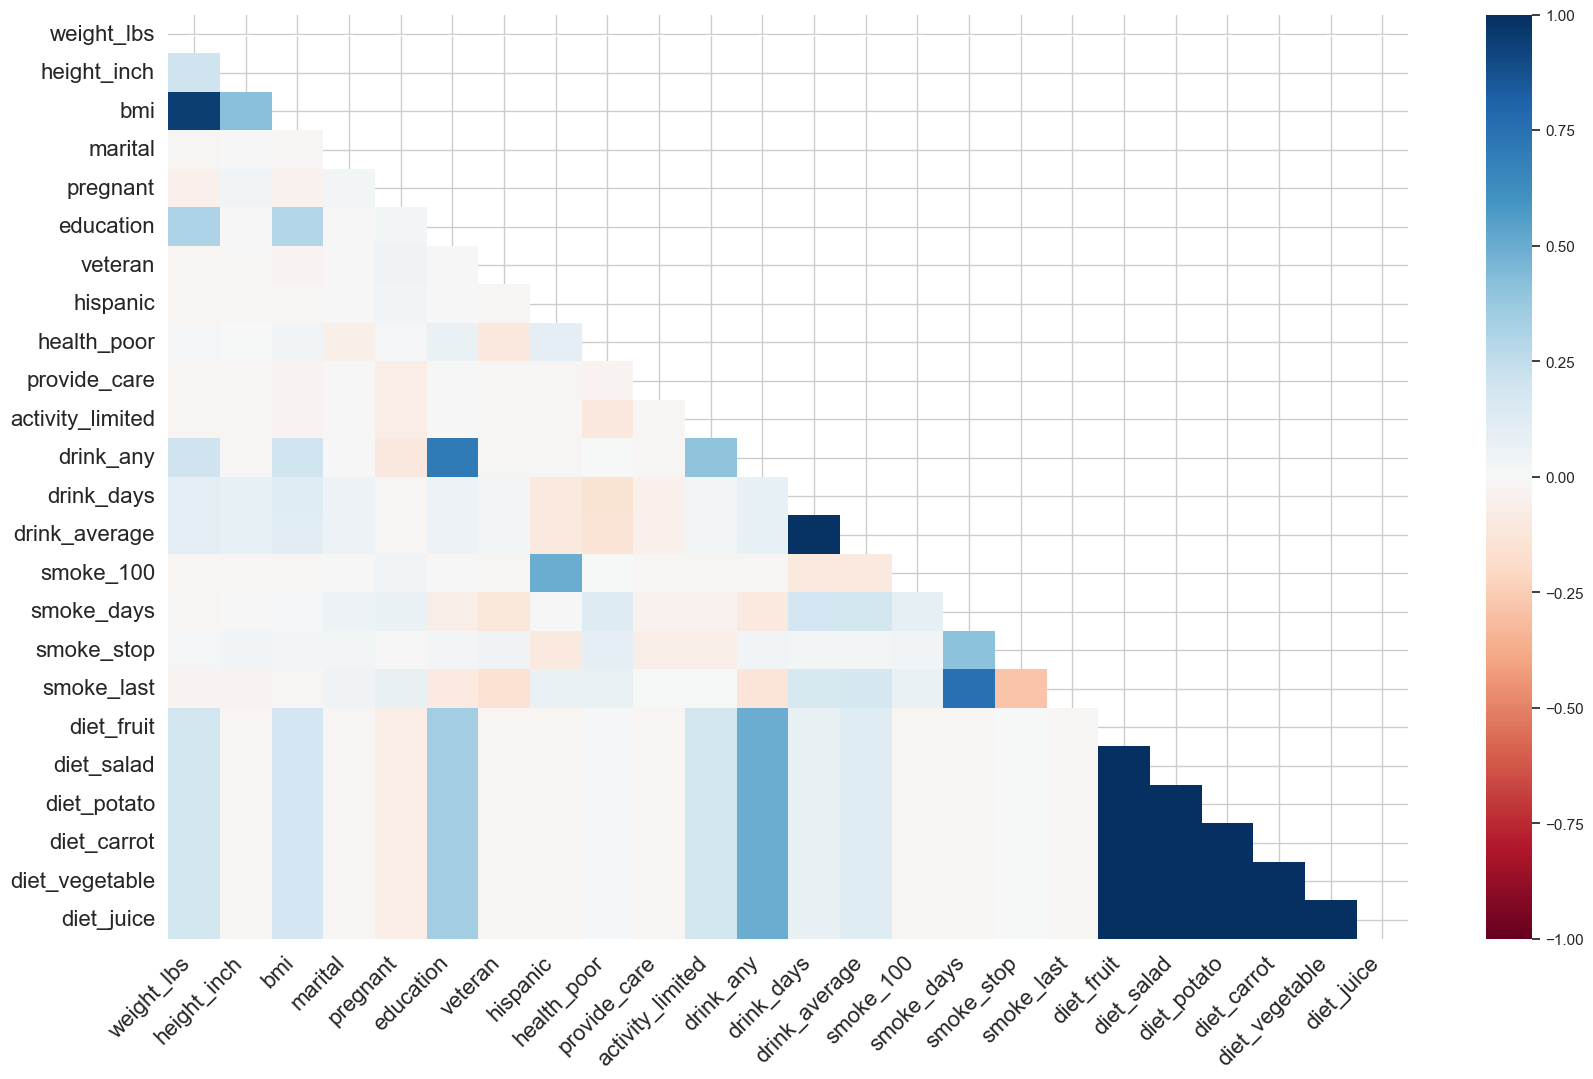

In [99]:
missingno.heatmap(
    df=riskfactors_df
)

<Axes: >

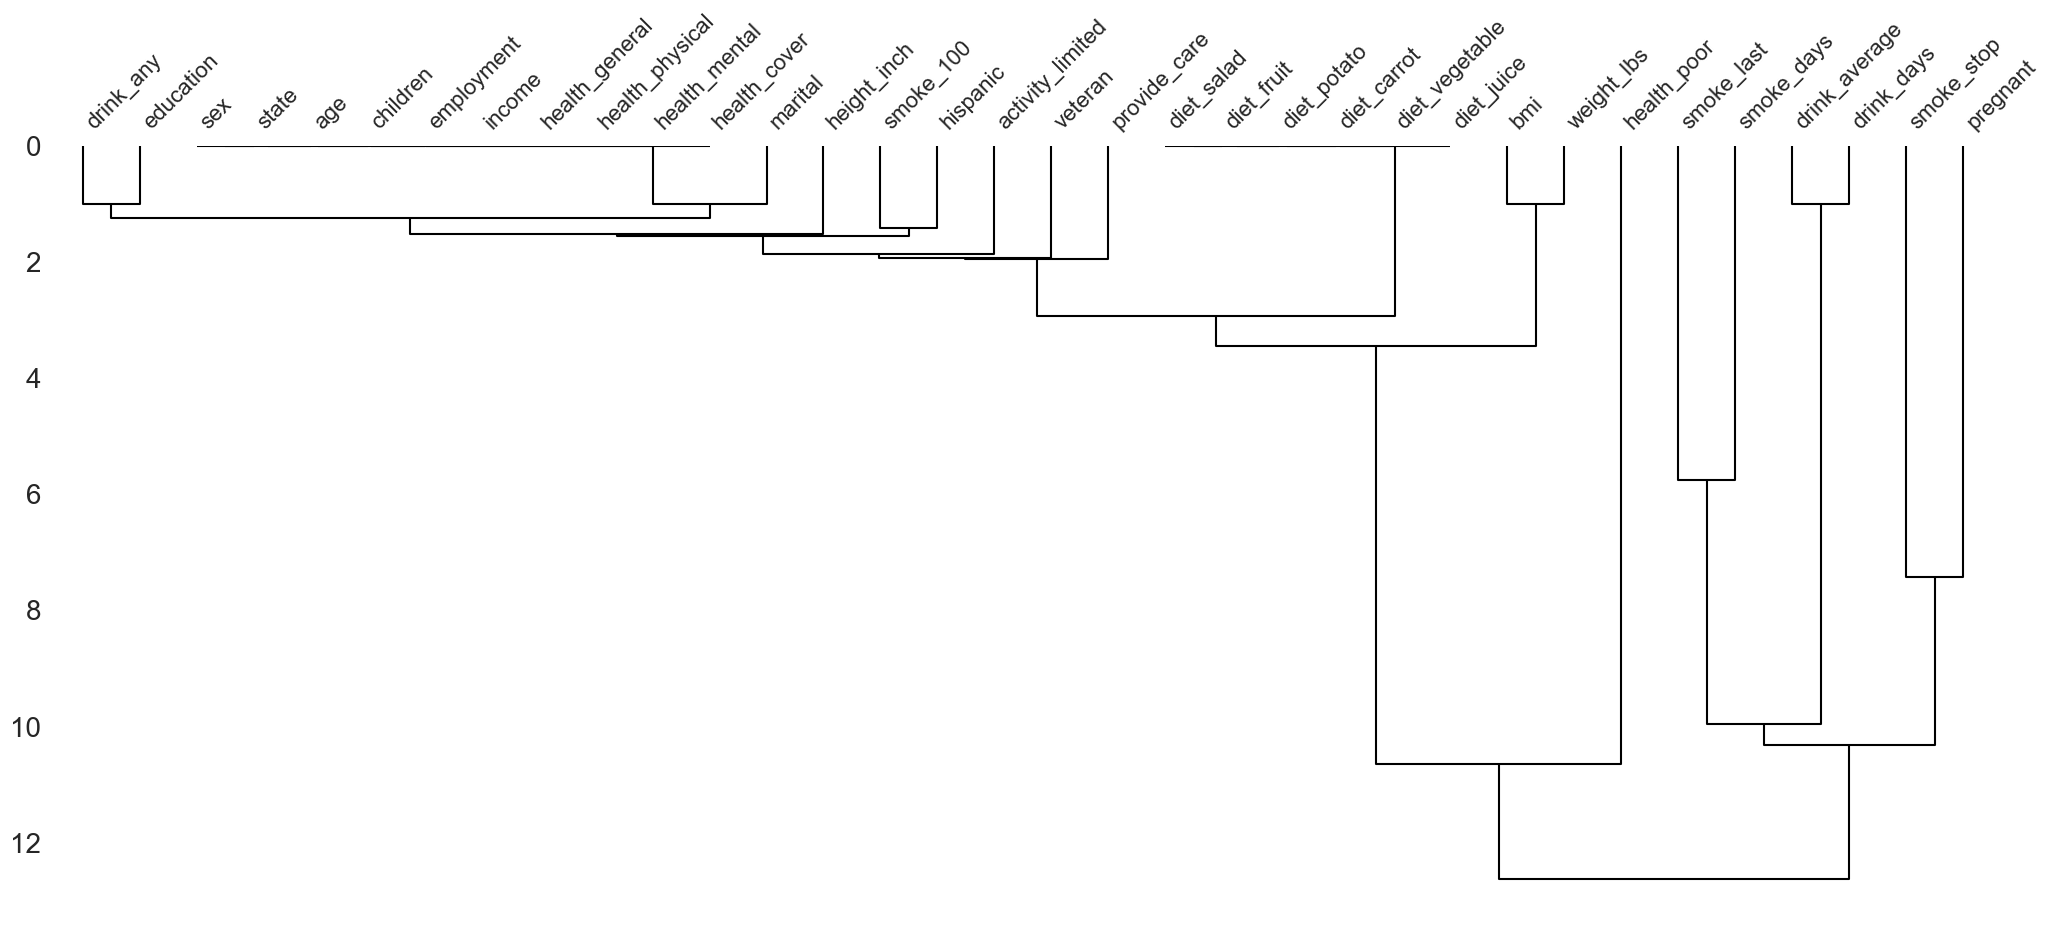

In [ ]:
missingno.dendrogram(
    df=riskfactors_df
)

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [100]:
riskfactors_df.shape

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

In [101]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [105]:
riskfactors_df.weight_lbs.isna().sum()

10

In [120]:
# tamaño: 245 y elementos no nulos: 235
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [111]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [116]:
#riskfactors_df.mean(skipna=False)
riskfactors_df.select_dtypes(exclude=["category"]).mean(skipna=False)

age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children             0.42449
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: object

In [106]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [117]:
# elimina toda la fila
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs"],
        how="any"
    )
    .shape
)

(235, 34)

#### Con base en 2 o más columnas

In [121]:
# con any
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .shape
)

(234, 34)

In [ ]:
# con all
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
    .shape
)

(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

In [123]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs", "height_inch"]) # janitor
)


,weight_lbs,height_inch
0,190,64
1,170,68
2,163,64
3,230,74
4,135,62
...,...,...
240,144,63
241,170,74
242,175,71
243,138,64


<Axes: >

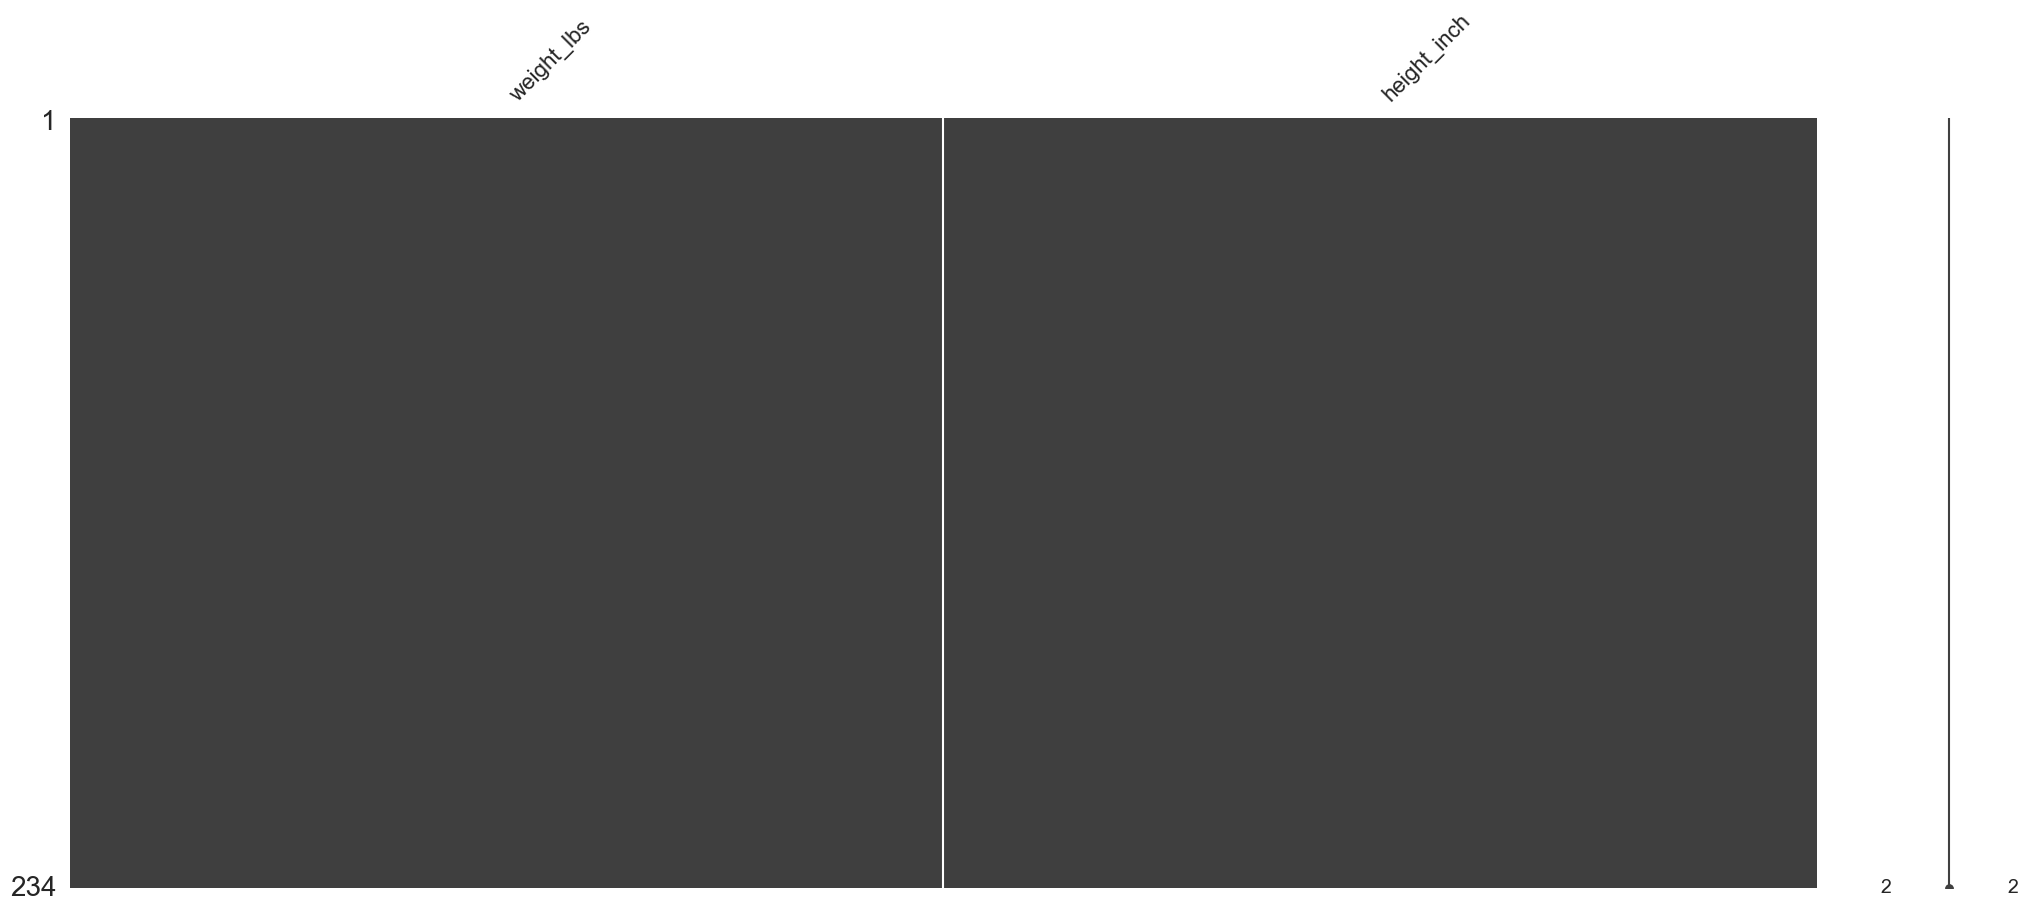

In [125]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs", "height_inch"]) # janitor
    .pipe(
        lambda df: missingno.matrix(df)
    )
)

<Axes: >

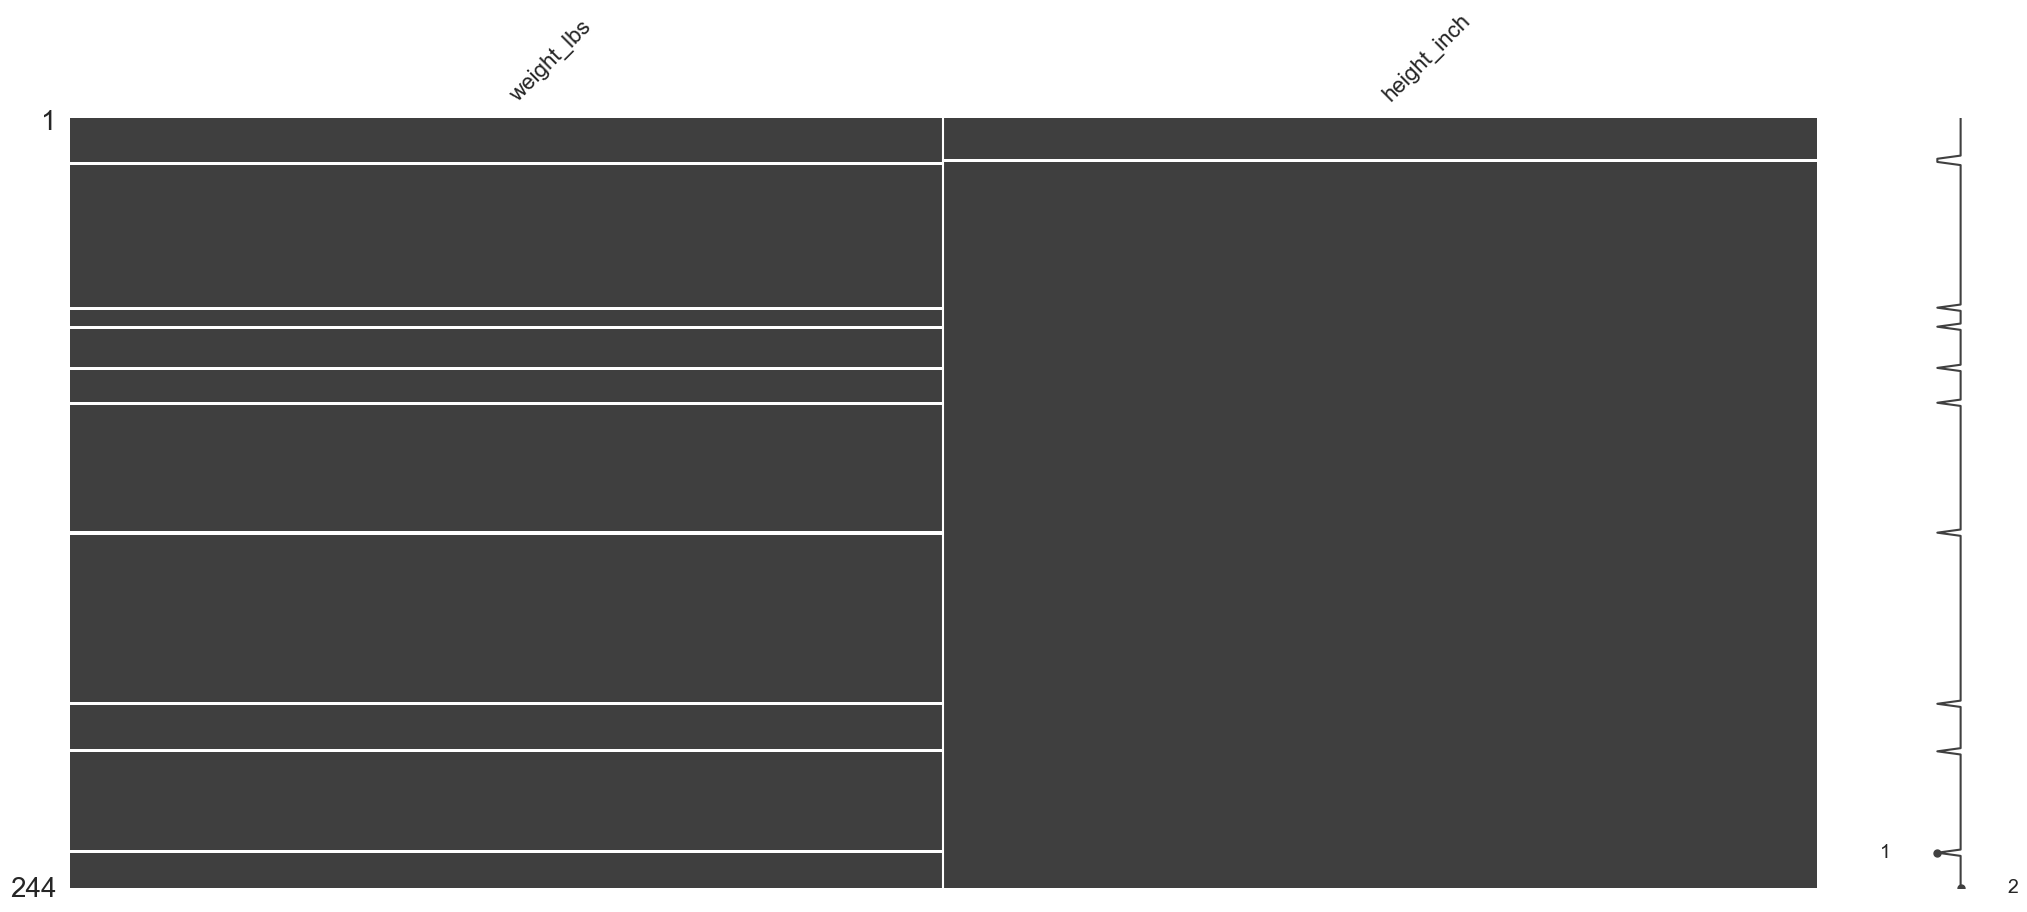

In [126]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(
        lambda df: missingno.matrix(df)
    )
)

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [127]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [130]:
# Rellenado hacia adelante (forward fill); Pandas
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

In [132]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
)

,weight_lbs,height_inch,bmi
0,190,64,32.68
1,170,68,25.90
2,163,64,28.04
3,230,74,29.59
4,135,62,24.74
...,...,...,...
240,144,63,25.56
241,170,74,21.87
242,175,71,24.46
243,138,64,23.74


In [139]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .head(14)
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190,64,32.68,False,False,False
1,170,68,25.90,False,False,False
2,163,64,28.04,False,False,False
3,230,74,29.59,False,False,False
4,135,62,24.74,False,False,False
5,165,70,23.72,False,False,False
6,150,68,22.86,False,False,False
7,170,70,24.44,False,False,False
8,146,70,20.99,False,False,False
9,260,73,34.37,False,False,False


In [152]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .bmi_NA.sum()
)

11

In [147]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [158]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .assign(
        weight_lbs=lambda df: df['weight_lbs'].fillna(df['weight_lbs'].mean()),
        height_inch=lambda df: df['height_inch'].fillna(df['height_inch'].mean()),
        bmi=lambda df: df.apply(
            lambda row: 
                (row['weight_lbs']/2.20462) / ((row['height_inch']*0.0254) ** 2) 
                if pd.isna(row['bmi']) else row['bmi'],
            axis=1
        )
    )
    #.info()
    #.head(14)
)


,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.000000,32.680000,False,False,False
1,170.0,68.000000,25.900000,False,False,False
2,163.0,64.000000,28.040000,False,False,False
3,230.0,74.000000,29.590000,False,False,False
4,135.0,62.000000,24.740000,False,False,False
5,165.0,70.000000,23.720000,False,False,False
6,150.0,68.000000,22.860000,False,False,False
7,170.0,70.000000,24.440000,False,False,False
8,146.0,70.000000,20.990000,False,False,False
9,260.0,73.000000,34.370000,False,False,False


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Figure size 1000x1000 with 0 Axes>

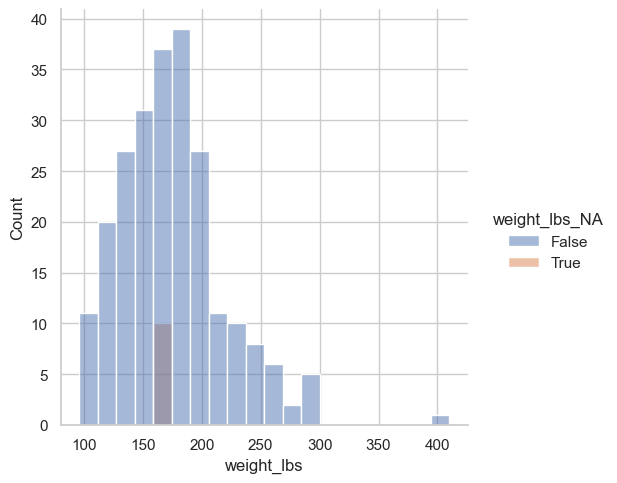

In [131]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA"
            )
        )
    )
)

/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

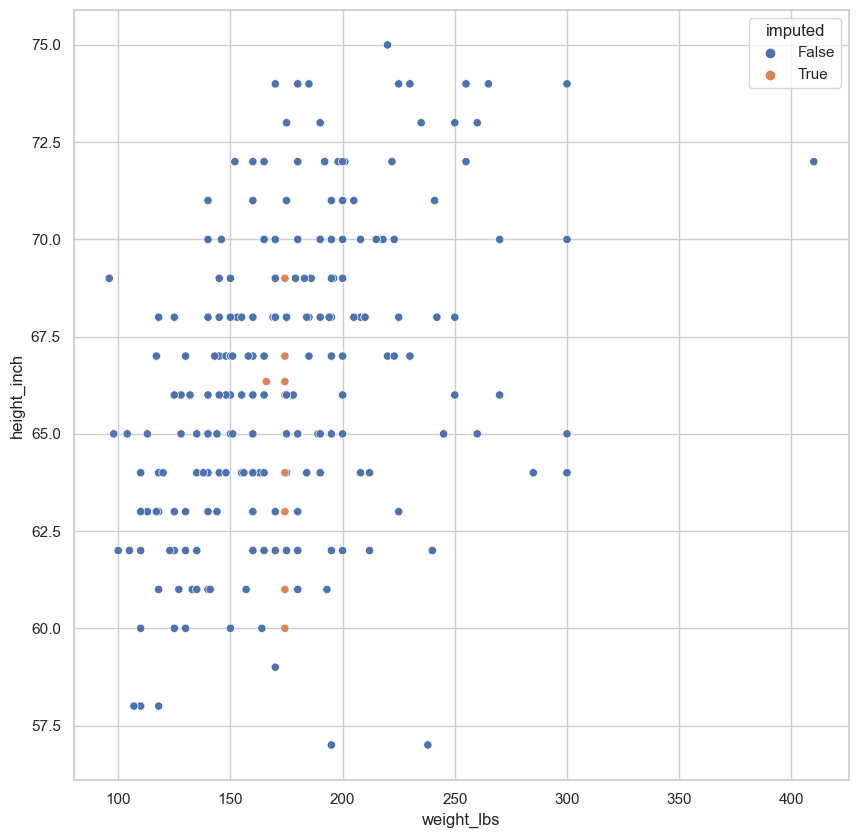

In [159]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)

# Bonus: visualización múltiple de imputaciones

In [163]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


In [164]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
)

,weight_lbs_NA,height_inch_NA,bmi_NA,variable,value
0,False,False,False,weight_lbs,190.00
1,False,False,False,weight_lbs,170.00
2,False,False,False,weight_lbs,163.00
3,False,False,False,weight_lbs,230.00
4,False,False,False,weight_lbs,135.00
...,...,...,...,...,...
730,False,False,False,bmi,25.56
731,False,False,False,bmi,21.87
732,False,False,False,bmi,24.46
733,False,False,False,bmi,23.74


In [165]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
)

,variable,value,variable_NA,value_NA
0,weight_lbs,190.00,weight_lbs_NA,False
1,weight_lbs,170.00,weight_lbs_NA,False
2,weight_lbs,163.00,weight_lbs_NA,False
3,weight_lbs,230.00,weight_lbs_NA,False
4,weight_lbs,135.00,weight_lbs_NA,False
...,...,...,...,...
2200,bmi,25.56,bmi_NA,False
2201,bmi,21.87,bmi_NA,False
2202,bmi,24.46,bmi_NA,False
2203,bmi,23.74,bmi_NA,False


In [166]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
)

,variable,value,variable_NA,value_NA,valid
0,weight_lbs,190.00,weight_lbs_NA,False,True
1,weight_lbs,170.00,weight_lbs_NA,False,True
2,weight_lbs,163.00,weight_lbs_NA,False,True
3,weight_lbs,230.00,weight_lbs_NA,False,True
4,weight_lbs,135.00,weight_lbs_NA,False,True
...,...,...,...,...,...
2200,bmi,25.56,bmi_NA,False,True
2201,bmi,21.87,bmi_NA,False,True
2202,bmi,24.46,bmi_NA,False,True
2203,bmi,23.74,bmi_NA,False,True


In [167]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
)

,variable,value,variable_NA,value_NA,valid
0,weight_lbs,190.00,weight_lbs_NA,False,True
1,weight_lbs,170.00,weight_lbs_NA,False,True
2,weight_lbs,163.00,weight_lbs_NA,False,True
3,weight_lbs,230.00,weight_lbs_NA,False,True
4,weight_lbs,135.00,weight_lbs_NA,False,True
...,...,...,...,...,...
2200,bmi,25.56,bmi_NA,False,True
2201,bmi,21.87,bmi_NA,False,True
2202,bmi,24.46,bmi_NA,False,True
2203,bmi,23.74,bmi_NA,False,True


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Figure size 1000x1000 with 0 Axes>

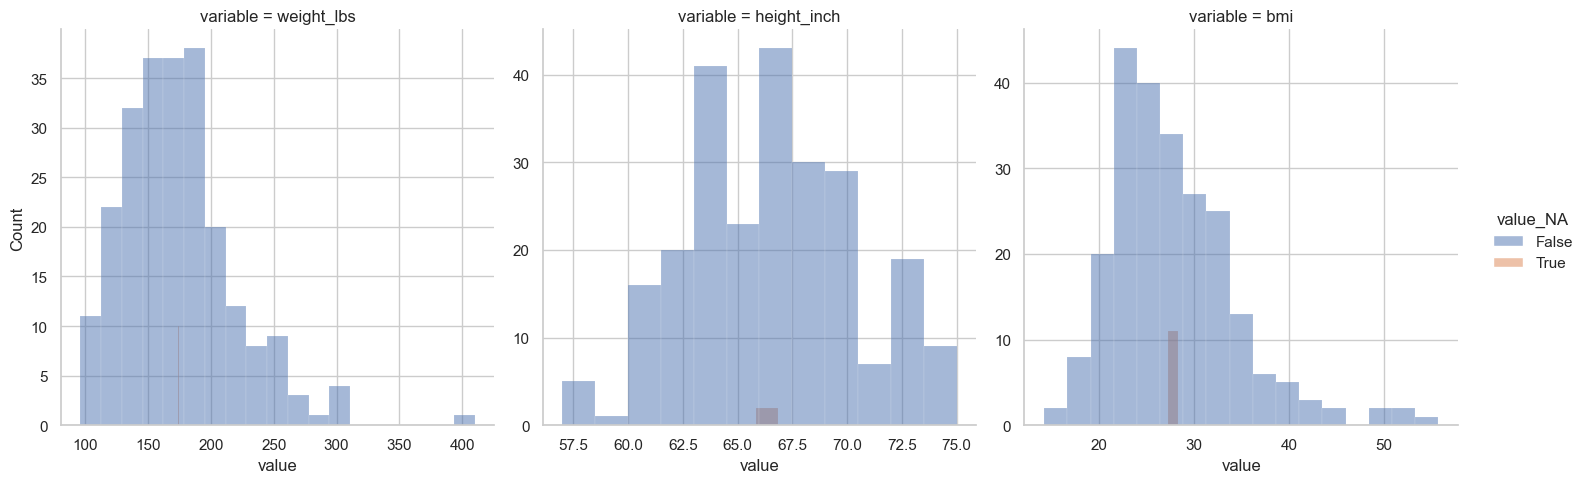

In [174]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)


/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniforge3/envs/detection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

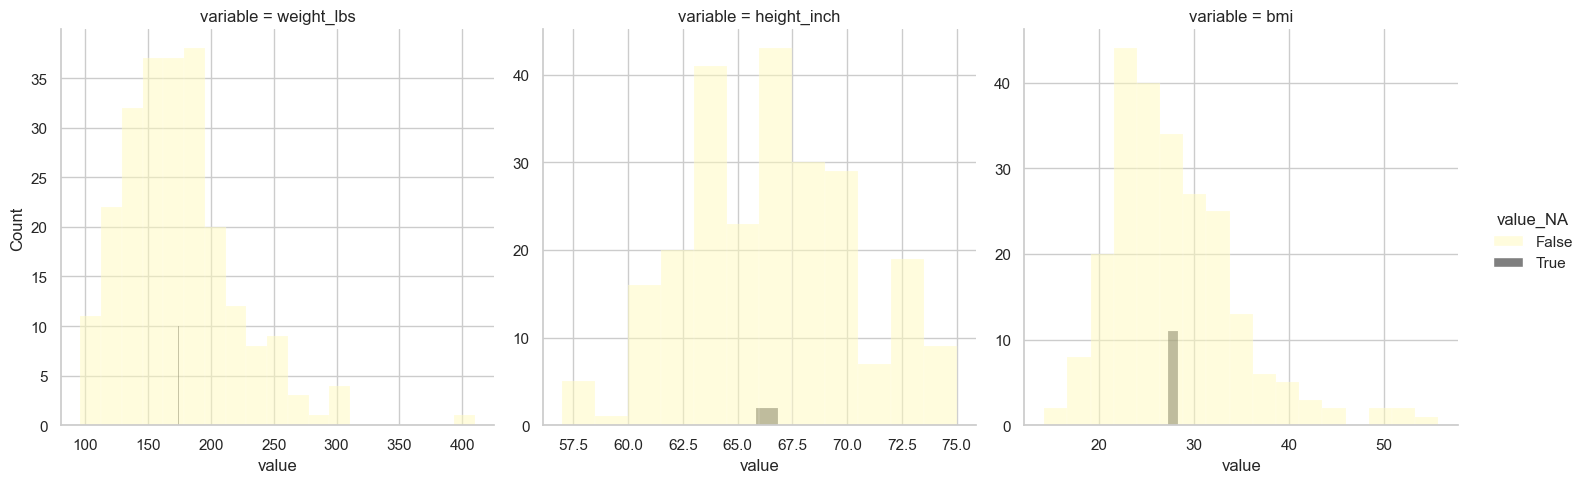

In [195]:
# Crear un conjunto de colores personalizado para los valores únicos presentes
#custom_palette = sns.color_palette("plasma", 3)
custom_palette = ["#fffabc", "#000000"]

# Resto del código
#plt.figure(figsize=(15, 30))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                palette=custom_palette,  # Aplicar el conjunto de colores personalizado
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)

plt.show()

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [128]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>